# Описание проекта

Вас пригласили на стажировку в отдел аналитики Афиши. Первое задание: помочь маркетологам оптимизировать маркетинговые затраты.

У вас в распоряжении есть данные от Афиши с июня 2017 по конец мая 2018 года:
- лог сервера с данными о посещениях сайта Афиши,
- выгрузка всех заказов за этот период,
- статистика рекламных расходов.

Вы изучите:
- как люди пользуются продуктом,
- когда они начинают покупать,
- сколько денег приносит каждый клиент
- когда клиент окупается.

## Инструкция по выполнению проекта:
### Шаг 1. Загрузите данные и подготовьте их к анализу
Загрузите данные о визитах, заказах и расходах в переменные. Оптимизируйте данные для анализа. Убедитесь, что тип данных в каждой колонке — правильный. Путь к файлам:
- /datasets/visits_log.csv. Скачать датасет
- /datasets/orders_log.csv. Скачать датасет
- /datasets/costs.csv. Скачать датасет
### Шаг 2. Постройте отчёты и посчитайте метрики
#### Продукт
- Сколько людей пользуются в день, неделю, месяц?
- Сколько сессий в день?
- Сколько длится одна сессия?
- Как часто люди возвращаются?
#### Продажи
- Когда люди начинают покупать?
- Сколько раз покупают за период?
- Какой средний чек?
- Сколько денег приносят? (LTV)
#### Маркетинг
- Сколько денег потратили? Всего / на каждый источник / по времени
- Сколько стоило привлечение одного покупателя из каждого источника?
- На сколько окупились расходы? (ROI)
- Отобразите на графиках, как эти метрики отличаются по устройствам и по рекламным источникам? Как они меняются во времени?

### Шаг 3. Напишите вывод: порекомендуйте маркетологам, куда и сколько им стоит вкладывать денег?
Какие источники/платформы вы бы порекомендовали? Объясните свой выбор: на какие метрики вы ориентируетесь? Почему? Какие выводы вы сделали, узнав значение метрик?


## Описание данных
### Таблица visits (лог сервера с информацией о посещениях сайта):
- Uid — уникальный идентификатор пользователя
- Device — категория устройства пользователя
- Start Ts — дата и время начала сессии
- End Ts — дата и время окончания сессии
- Source Id — идентификатор рекламного источника, из которого пришел пользователь

### Таблица orders (информация о заказах):
- Uid — уникальный id пользователя, который сделал заказ
- Buy Ts — дата и время заказа
- Revenue — выручка Яндекс.Афиши с этого заказа

### Таблица costs (информация о затратах на маркетинг):
- source_id — идентификатор рекламного источника
- dt — дата
- costs — затраты на этот рекламный источник в этот день


## Шаг 1. Загружаем библиотеки и данные
- /datasets/visits_log.csv
- /datasets/orders_log.csv
- /datasets/costs.csv

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
visits_log = pd.read_csv('/datasets/visits_log.csv')
orders_log = pd.read_csv('/datasets/orders_log.csv')
costs = pd.read_csv('/datasets/costs.csv')

### Оптимизируйте данные для анализа. Убедитесь, что тип данных в каждой колонке — правильный.
#### Посмотрим данные

In [3]:
display(visits_log)

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485


In [4]:
visits_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


#### Нужно конвертировать End Ts и Start Ts в тип  datetime

In [5]:
visits_log['End Ts'] = pd.to_datetime(visits_log['End Ts'])
visits_log['Start Ts'] = pd.to_datetime(visits_log['Start Ts'])

visits_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null datetime64[ns]
Source Id    359400 non-null int64
Start Ts     359400 non-null datetime64[ns]
Uid          359400 non-null uint64
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


In [6]:
display(orders_log)

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624
50411,2018-05-31 23:50:00,5.80,11369640365507475976
50412,2018-05-31 23:54:00,0.30,1786462140797698849
50413,2018-05-31 23:56:00,3.67,3993697860786194247


In [7]:
orders_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


#### Нужно изменить тип Buy Ts на datetime 

In [8]:
orders_log['Buy Ts'] = pd.to_datetime(orders_log['Buy Ts'])

In [9]:
orders_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null datetime64[ns]
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [10]:
display(costs)

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
...,...,...,...
2537,10,2018-05-27,9.92
2538,10,2018-05-28,21.26
2539,10,2018-05-29,11.32
2540,10,2018-05-30,33.15


In [11]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


#### Нужно изменить тип dt на datetime

In [12]:
costs['dt'] = pd.to_datetime(costs['dt'])

In [13]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null datetime64[ns]
costs        2542 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


### Шаг 2. Постройте отчёты и посчитайте метрики
#### Продукт
- Сколько людей пользуются в день, неделю, месяц?
- Сколько сессий в день?
- Сколько длится одна сессия?
- Как часто люди возвращаются?
#### Продажи
- Когда люди начинают покупать?
- Сколько раз покупают за период?
- Какой средний чек?
- Сколько денег приносят? (LTV)
#### Маркетинг
- Сколько денег потратили? Всего / на каждый источник / по времени
- Сколько стоило привлечение одного покупателя из каждого источника?
- На сколько окупились расходы? (ROI)
- Отобразите на графиках, как эти метрики отличаются по устройствам и по рекламным источникам? Как они меняются во времени?

## Продукт

## Сколько людей пользуются в день, неделю, месяц?
Посмотрим по таблице visits_log (лог сервера с информацией о посещениях сайта):
- Uid — уникальный идентификатор пользователя
- Device — категория устройства пользователя
- Start Ts — дата и время начала сессии
- End Ts — дата и время окончания сессии
- Source Id — идентификатор рекламного источника, из которого пришел пользователь

### Посчитаем среднее количество уникальных пользователей по дню, неделе и месяцу

In [14]:
visits_log['session_year']  = visits_log['Start Ts'].dt.year
visits_log ['session_month'] = visits_log['Start Ts'].dt.month
visits_log['session_week'] = visits_log['Start Ts'].dt.week
visits_log['session_date'] = visits_log['Start Ts'].dt.date

In [15]:
visits_log['session_date'] = visits_log['session_date'].astype('datetime64[D]')

In [16]:
dau_total =  visits_log.groupby('session_date').agg({'Uid': 'nunique'}).mean()

In [17]:
wau_total =  visits_log.groupby(['session_year','session_week']).agg({'Uid': 'nunique'}).mean()

In [18]:
mau_total = visits_log.groupby(['session_year', 'session_month']).agg({'Uid': 'nunique'}).mean()

In [19]:
print('DAU:',dau_total[0].round(), ' WAU:',  wau_total[0].round(), ' MAU:', mau_total[0].round())

DAU: 908.0  WAU: 5716.0  MAU: 23228.0


## Ответ: Сколько людей пользуются в день, неделю, месяц в целом? 
- DAU - 908
- WAU - 5716
- MAU - 23228

## DAU, WAU, MAU и средний чек нужно отобразить на временных графиках с разбивкой по источнику и типу устройства

## DAU по типу устройства:

In [20]:
dau_device =  visits_log.groupby(['Device', 'session_date']).agg({'Uid': 'nunique'}).reset_index()

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


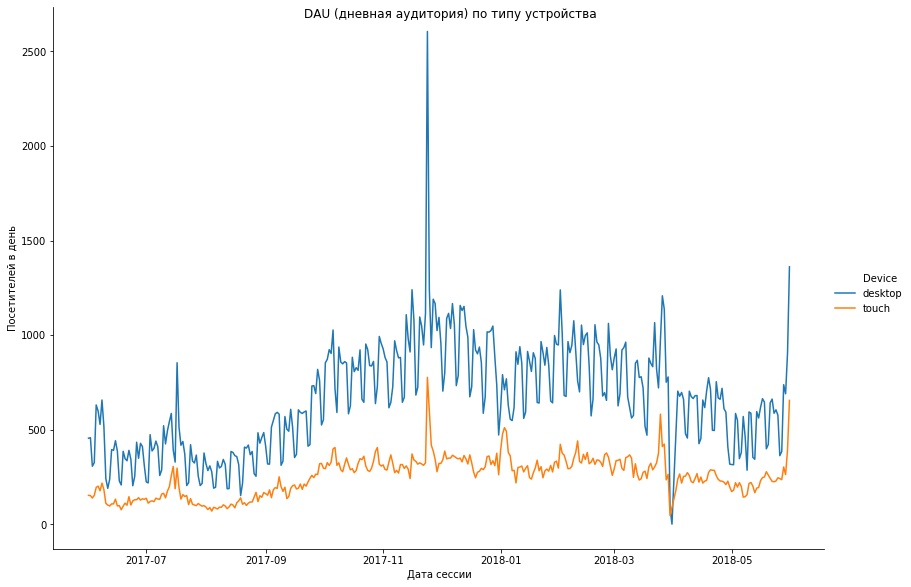

In [21]:
ax = sns.relplot(label='DAU with device type',x='session_date', y='Uid', kind='line', 
            hue='Device', height=8.27, aspect=11.7/8.27, data = dau_device)
ax.set(xlabel='Дата сессии', ylabel='Посетителей в день')
ax.fig.suptitle('DAU (дневная аудитория) по типу устройства')
plt.show();

In [22]:
dau_device.groupby('Device')['Uid'].mean().round()

Device
desktop    659.0
touch      253.0
Name: Uid, dtype: float64

In [23]:
dau_device.groupby('Device')['Uid'].median()

Device
desktop    649
touch      264
Name: Uid, dtype: int64

## Вывод: DAU по типу устройства
- DAU выше в десктопе - 250-1200
- DAU в таче - в среднем от 100 до 300.

## Среднее DAU по типу устройства
- desktop    659.0
- touch      253.0

## Медианное DAU по типу устройства
- desktop    649
- touch      264

## DAU по source ID

In [24]:
dau_source =  visits_log.groupby(['Source Id', 'session_date']).agg({'Uid': 'nunique'}).reset_index()

In [25]:
dau_source.describe()

,Source Id,Uid
count,2582.000000,2582.000000
mean,4.886522,133.234314
std,3.167649,114.700488
min,1.000000,1.000000
25%,2.000000,40.000000
50%,4.000000,105.000000
75%,9.000000,195.000000
max,10.000000,932.000000


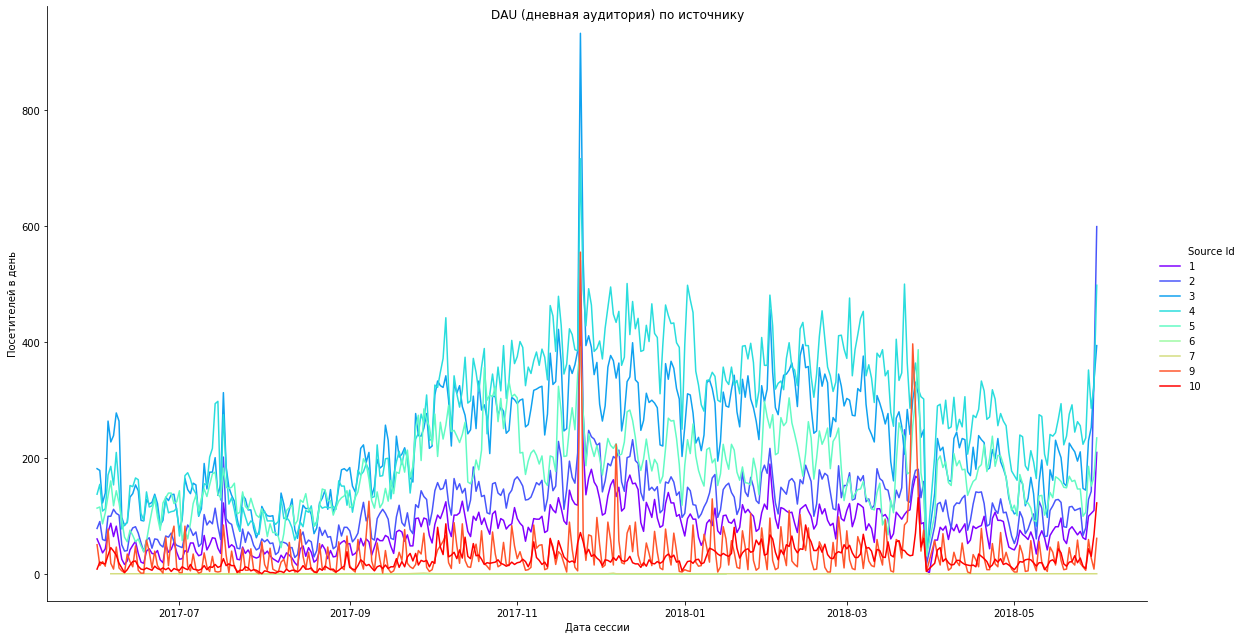

In [26]:
ax = sns.relplot(x='session_date', y='Uid', kind='line', hue='Source Id', height=9,legend="full", 
            aspect=1.8, data = dau_source, palette='rainbow')
ax.set(xlabel='Дата сессии', ylabel='Посетителей в день')
ax.fig.suptitle('DAU (дневная аудитория) по источнику')
plt.show();

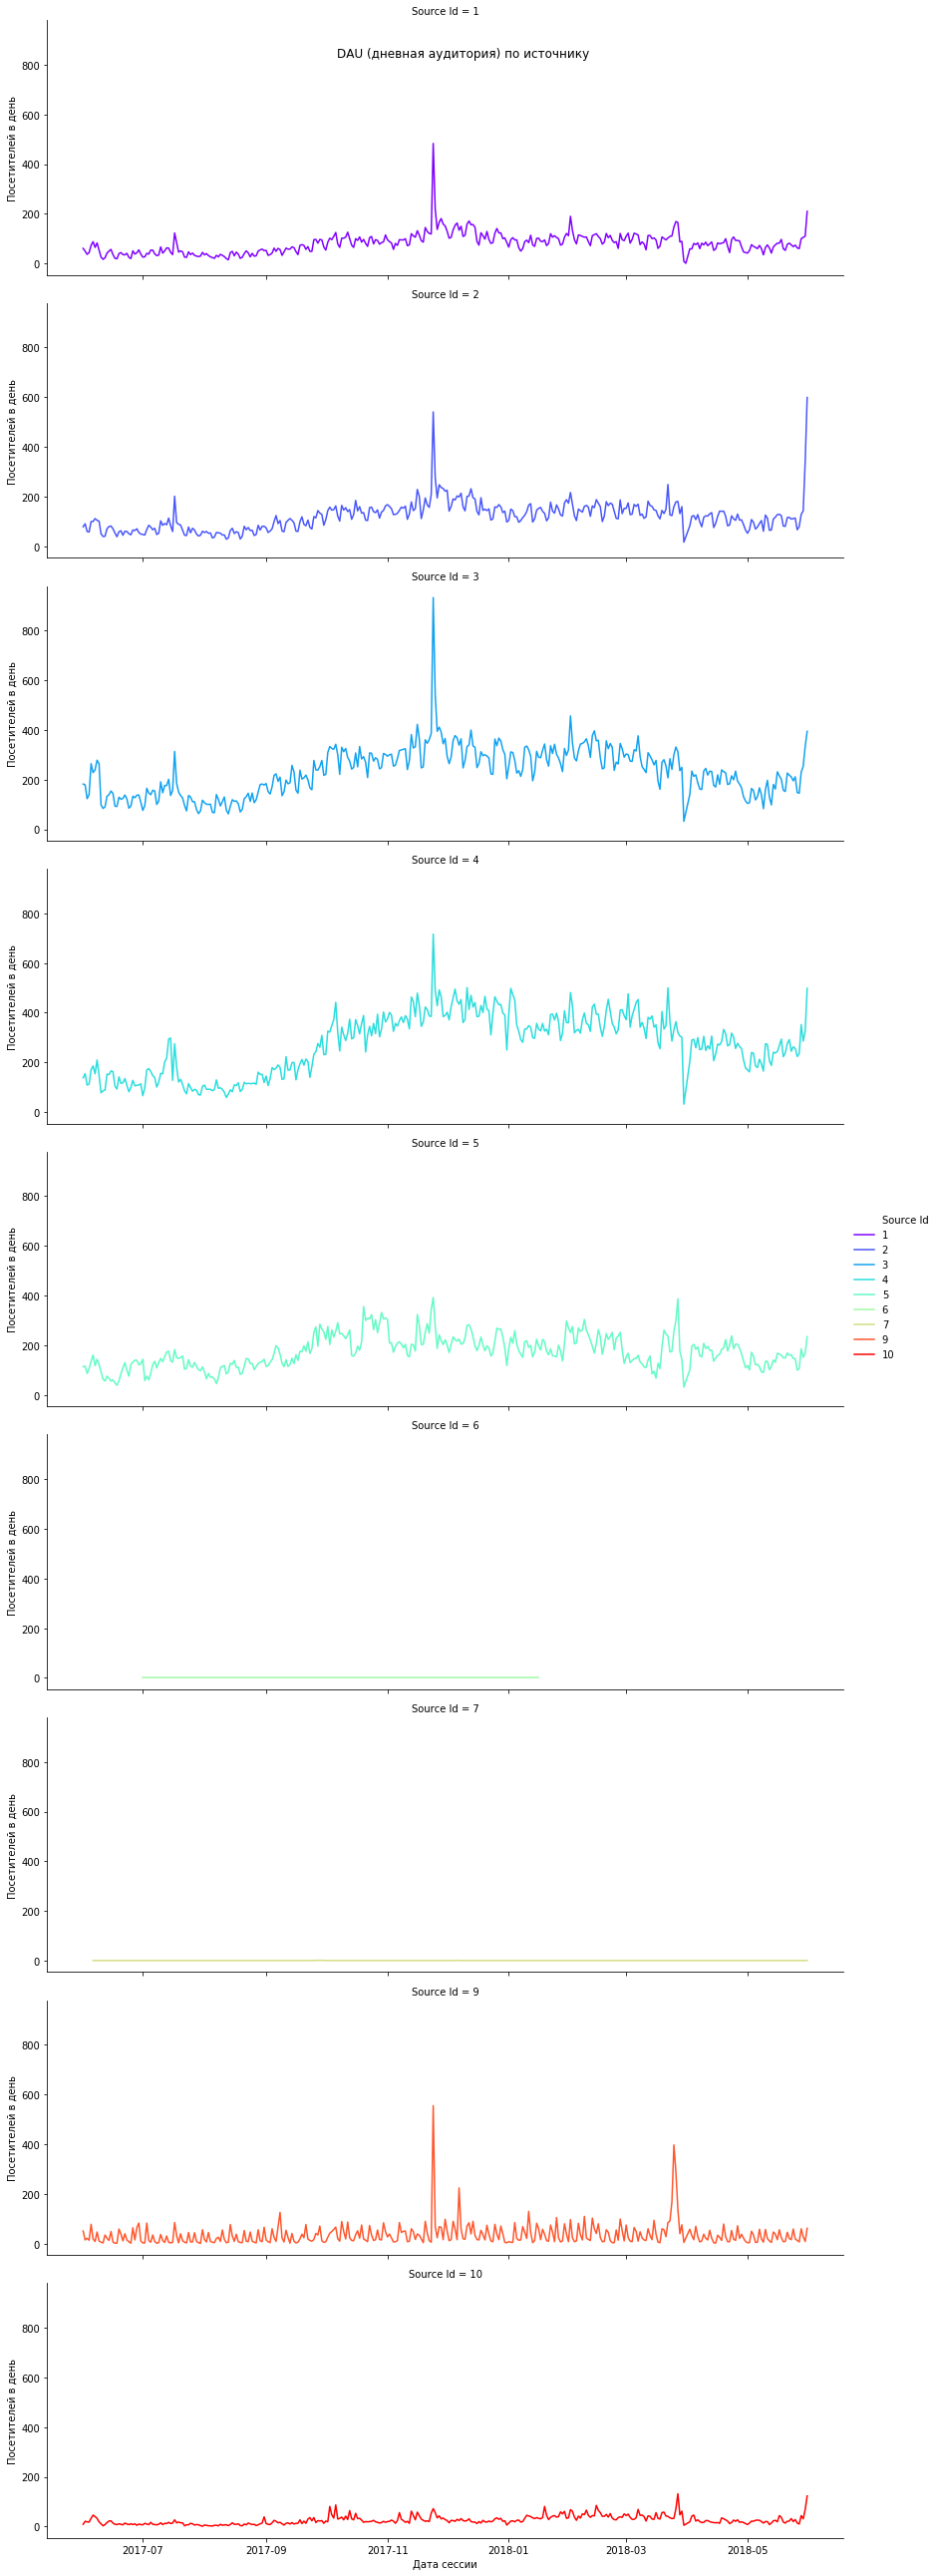

''

In [27]:
ax = sns.relplot(x='session_date', y='Uid', kind='line', hue='Source Id', 
            col='Source Id', height=4, aspect=3, col_wrap=1,legend="full", data = dau_source, palette='rainbow')
ax.set(xlabel='Дата сессии', ylabel='Посетителей в день')
ax.fig.suptitle('DAU (дневная аудитория) по источнику')
plt.show()
;

## Вывод: DAU по источникам

- Источники 6 и 7 - дают 0 DAU. Вероятно, не используются.
- Источники 9 и 10 - приносят в среднем менее 200 DAU. 
- Источники 1 и 2 дают в среднем около 200 DAU.
- Источники 3 и 4 выглядят самыми эффективными. Они дают DAU в диапазоне 150-450.
- Источник 5 дает в среднем 150-400 DAU.
---------------------
- Все источники (кроме 6,7,10) показали пиковые значения в декабре. 
- Есть заметный пик по источнику 9 - примерно в апреле.
- Есть пик в июне 2018 по источникам 1,2,3,4.

In [28]:
# >>> код от ревьюера
visits_log.groupby('session_date').agg({'Uid': 'nunique'}).sort_values('Uid', ascending = False).head(3)

,Uid
session_date,
2017-11-24,3319
2018-05-31,1997
2017-11-25,1817


## MAU по типу устройства:

In [29]:
visits_log['session_year_month'] =  visits_log['session_date'].astype('datetime64[M]')

In [30]:
mau_device =  visits_log.groupby(['Device', 'session_year_month']).agg({'Uid': 'nunique'}).reset_index()

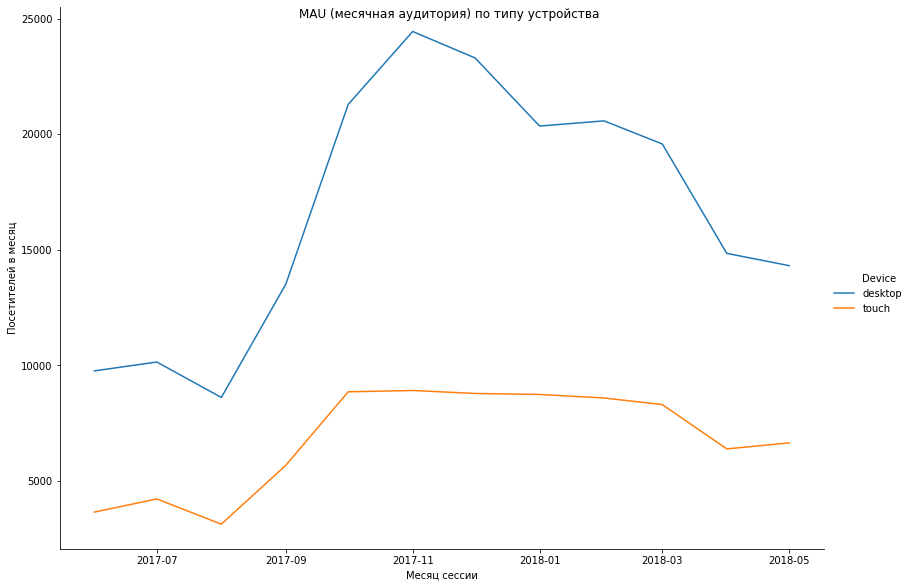

''

In [31]:
ax = sns.relplot(x='session_year_month', y='Uid', kind='line', 
            hue='Device', height=8.27, aspect=11.7/8.27, data = mau_device)
ax.set(xlabel='Месяц сессии', ylabel='Посетителей в месяц')
ax.fig.suptitle('MAU (месячная аудитория) по типу устройства')
plt.show()
;

## Вывод из графика
- основной вклад в MAU дает десктоп
- пик посещения в ноябре повторяется на обеих платформах
- падение наблюдается в августе


In [32]:
mau_device.groupby('Device')['Uid'].mean()

Device
desktop    16724.916667
touch       6825.916667
Name: Uid, dtype: float64

In [33]:
mau_device.groupby('Device')['Uid'].median()

Device
desktop    17209
touch       7475
Name: Uid, dtype: int64

## Среднее MAU по типу устройства:
- desktop - 16724
- touch - 6825

## Медианное MAU по типу устройства:
- desktop - 17209
- touch - 7475

## MAU по источнику

In [34]:
 mau_source =  visits_log.groupby(['Source Id', 'session_year_month']).agg({'Uid': 'nunique'}).reset_index()

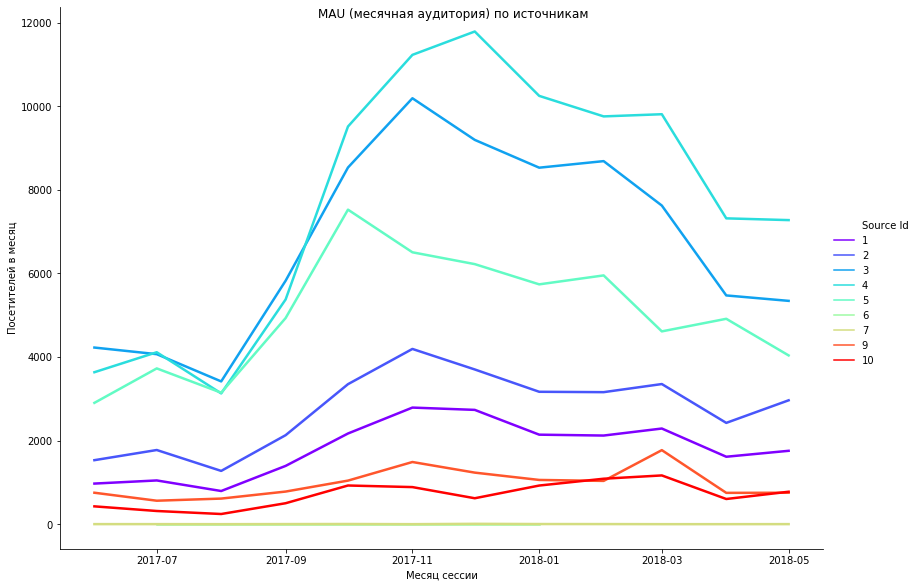

''

In [35]:
ax = sns.relplot(x='session_year_month', y='Uid', kind='line', linewidth=2.5,
            hue='Source Id',legend="full", height=8.27, aspect=11.7/8.27, data = mau_source, palette='rainbow')
ax.set(xlabel='Месяц сессии', ylabel='Посетителей в месяц')
ax.fig.suptitle('MAU (месячная аудитория) по источникам')
plt.show()
;

## Промежуточные выводы по MAU
- небольшое падение MAU (менее 4000 на крупный источник) в августе 
- резкиq рост с сентября до декабря (c 4000 до 12000 на крупный источник)
- после декабря происходит плавное падение MAU (до менее чем 8000 на крупный источник)

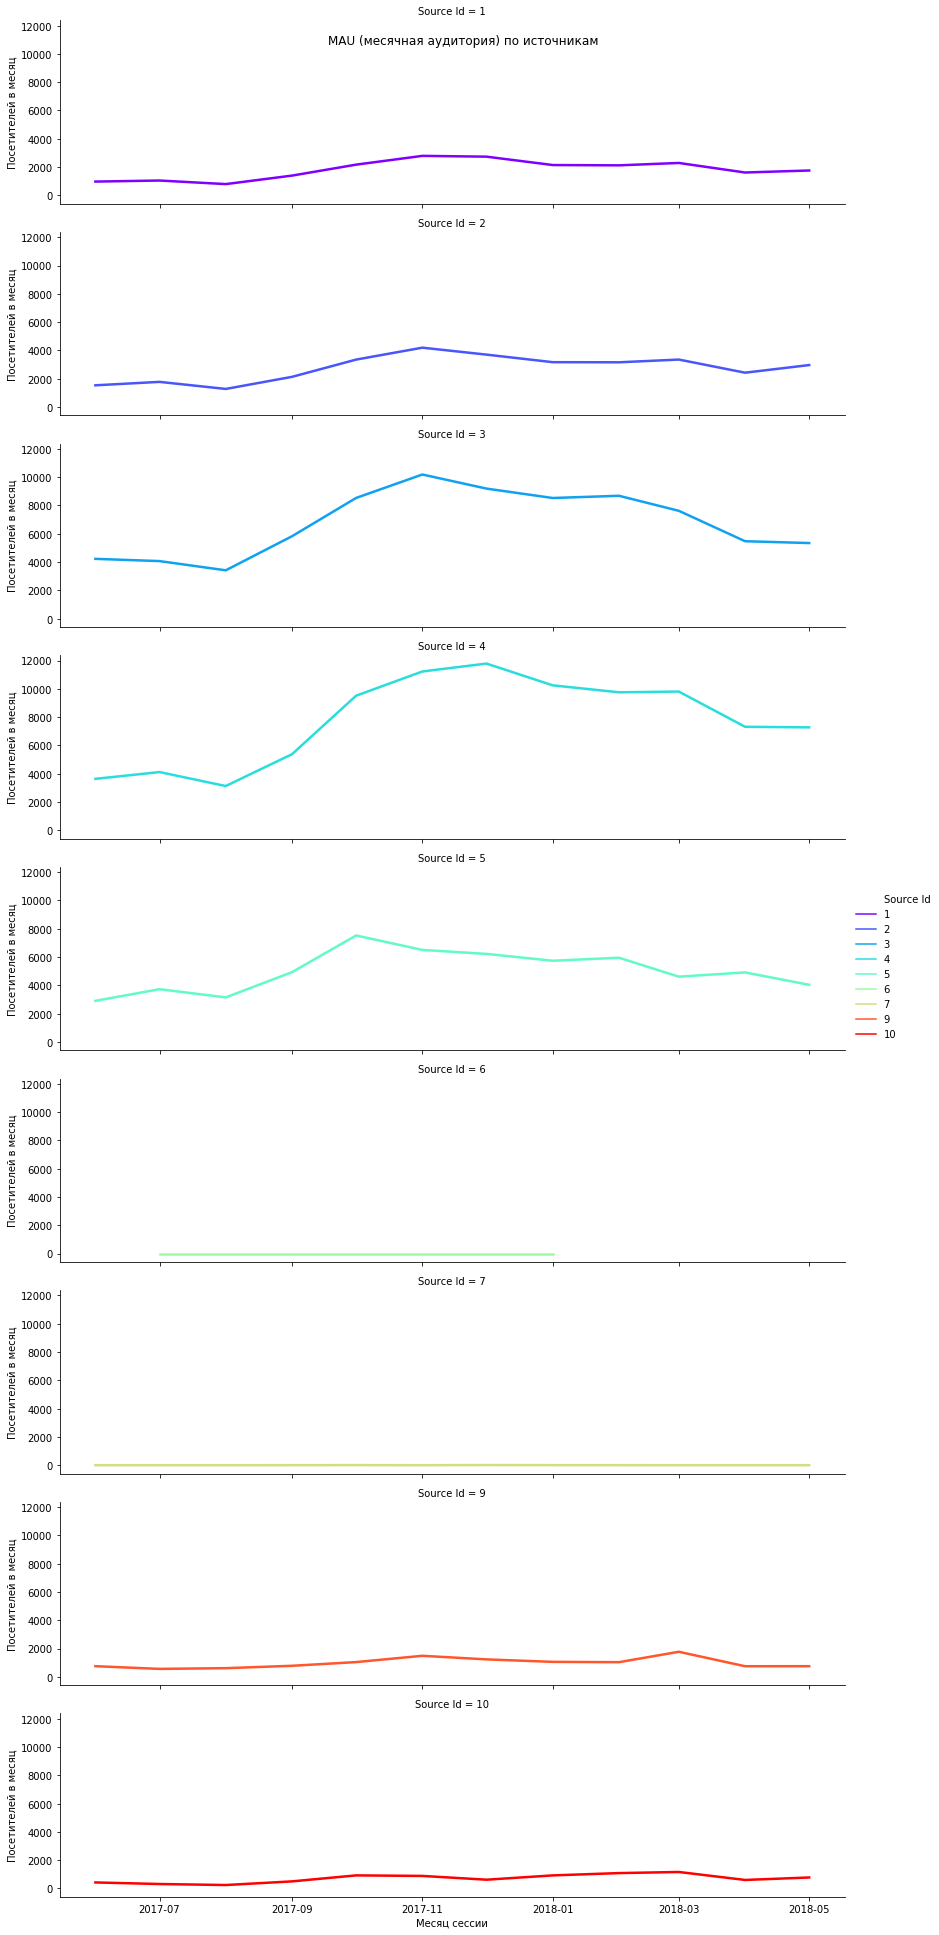

''

In [36]:
ax = sns.relplot(x='session_year_month', y='Uid', kind='line', hue='Source Id',
            legend="full", col='Source Id', linewidth=2.5, height=3, 
            aspect=4, col_wrap=1, data = mau_source, palette='rainbow')
ax.set(xlabel='Месяц сессии', ylabel='Посетителей в месяц')
ax.fig.suptitle('MAU (месячная аудитория) по источникам')
plt.show()
;

## Промежуточные выводы
### MAU
- источники 3 и 4 дают основной вклад в MAU - 6-10 тыс  
- источник 5 тоже дает значимый вклад начиная с октября 2017 - 4-6 тыс
- источники 1 и 2 дают небольшой, но стабильный вклад - 2-3 тыс

 ## WAU по типу источника

In [37]:
visits_log.head()

,Device,End Ts,Source Id,Start Ts,Uid,session_year,session_month,session_week,session_date,session_year_month
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,2017-12-01
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,2018-02-01
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,2018-05-01
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27,2017-12-01


In [38]:
visits_log['session_year_week'] =  visits_log['session_date'].astype('datetime64[W]')
visits_log.head()

,Device,End Ts,Source Id,Start Ts,Uid,session_year,session_month,session_week,session_date,session_year_month,session_year_week
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,2017-12-01,2017-12-14
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,2018-02-01,2018-02-15
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,2017-07-01,2017-06-29
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,2018-05-01,2018-05-17
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27,2017-12-01,2017-12-21


In [39]:
wau_source =  visits_log.groupby(['Source Id', 'session_year_week']).agg({'Uid': 'nunique'}).reset_index()

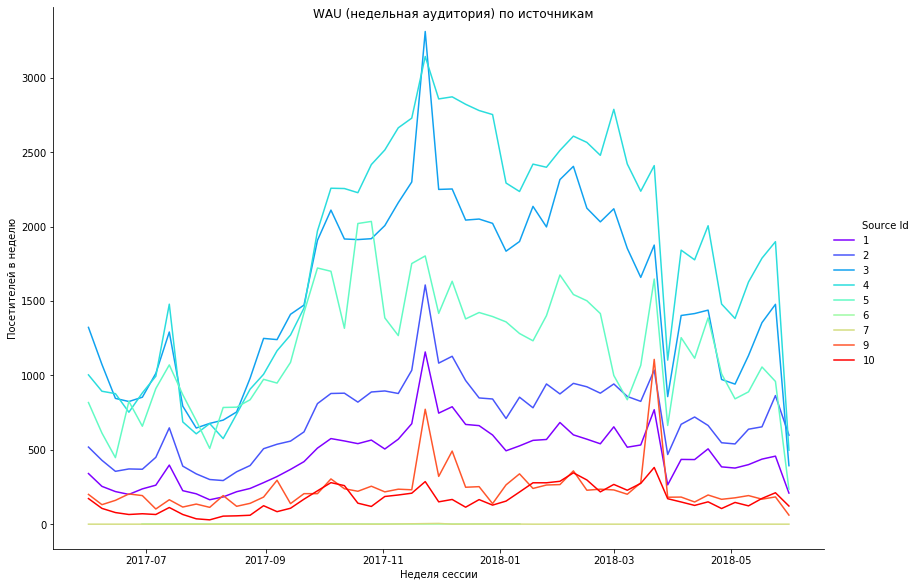

''

In [40]:
ax = sns.relplot(x='session_year_week', y='Uid', kind='line', hue='Source Id',legend="full", height=8.27, 
            aspect=11.7/8.27, data = wau_source, palette='rainbow')
ax.set(xlabel='Неделя сессии', ylabel='Посетителей в неделю')
ax.fig.suptitle('WAU (недельная аудитория) по источникам')
plt.show()
;

## WAU по типу устройства

## Возьмем день начала недели для расчета WAU

In [41]:
wau_device =  visits_log.groupby(['Device', 'session_year_week']).agg({'Uid': 'nunique'}).reset_index()

In [42]:
wau_device

,Device,session_year_week,Uid
0,desktop,2017-06-01,3015
1,desktop,2017-06-08,2431
2,desktop,2017-06-15,2168
3,desktop,2017-06-22,2231
4,desktop,2017-06-29,2233
...,...,...,...
101,touch,2018-05-03,1229
102,touch,2018-05-10,1378
103,touch,2018-05-17,1645
104,touch,2018-05-24,1805


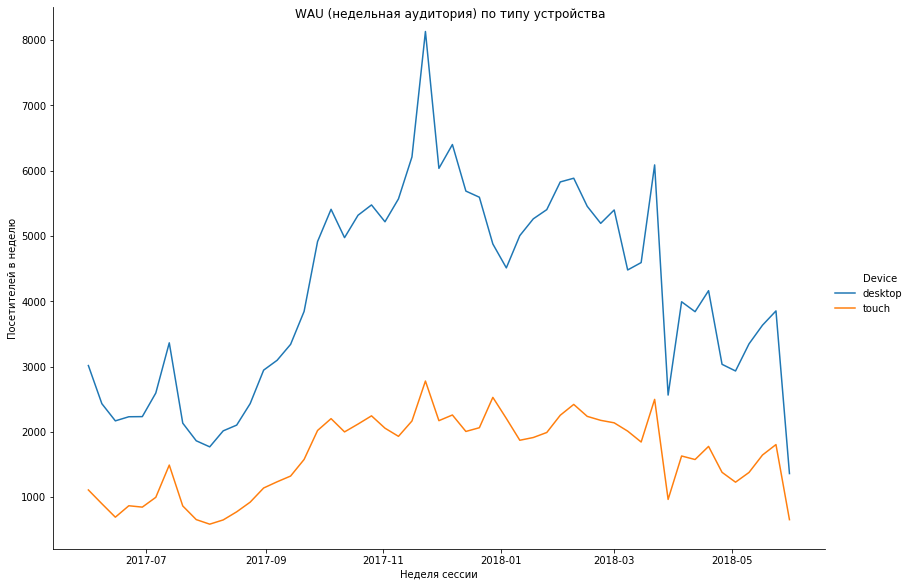

In [43]:
ax = sns.relplot(x='session_year_week', y='Uid', kind='line', hue='Device', 
            legend="full",height=8.27, aspect=11.7/8.27, data = wau_device)
ax.set(xlabel='Неделя сессии', ylabel='Посетителей в неделю')
ax.fig.suptitle('WAU (недельная аудитория) по типу устройства')
plt.show();

## Вывод по графику WAU по типу устройства
- есть пик в декабре и апреле, особенно заметный на десктопе
- пиковое значение в десктопе в декабре - 8000
- пиковое значение в десктопе в апреле - 6000

In [44]:
wau_device.groupby('Device')['Uid'].mean().round()

Device
desktop    4136.0
touch      1637.0
Name: Uid, dtype: float64

In [45]:
wau_device.groupby('Device')['Uid'].median()

Device
desktop    4162
touch      1805
Name: Uid, dtype: int64

## Среднее значение WAU
- desktop    4136
- touch      1637

## Медианное значение WAU
- desktop    4162
- touch      1805

# Общий вывод по DAU / WAU / MAU

## Сколько людей пользуются в день, неделю, месяц в целом?
- DAU - 908
- WAU - 5716
- MAU - 23228


# В целом распределение MAU и WAU соответствует распределению DAU по источникам и устройствам (пики и провалы в одни и те же промежутки времени
# Источники, показывающие пики и дающие основной вклад (3,4,5,2,1), стоит развивать и использовать больше
# Desktop дает более чем в 2 раза больше пользователей, чем тач. В развитие декстопа стоит вкладывать больше денег


## MAU по источникам
- 3 и 4 дают основной вклад в MAU - 6-10 тыс
- 5 тоже дает значимый вклад начиная с октября 2017 - 4-6 тыс
- 1 и 2 дают небольшой, но стабильный вклад - 2-3 тыс

## Среднее MAU по типу устройства:
- desktop - 16724
- touch - 6825

## Медианное MAU по типу устройства:
- desktop - 17209
- touch - 7475

## MAU по источникам с течением времени
- небольшое падение MAU (менее 4000 на крупный источник) в августе
- резкий рост с сентября до декабря (c 4000 до 12000 на крупный источник)
- после декабря происходит плавное падение MAU (до менее чем 8000 на крупный источник)
---------

## WAU по типу устройства:
- есть пик в декабре и апреле, особенно заметный на десктопе
- пиковое значение в десктопе в декабре - 8000
- пиковое значение в десктопе в апреле - 6000

## Среднее WAU по типу устройства:
- desktop 4136
- touch 1637

## Медианное WAU по типу устройства:
- desktop 4162
- touch 1805
----------

## DAU по типу устройства
- DAU выше в десктопе - 250-1200
- DAU в таче - в среднем от 100 до 300.

## Среднее DAU по типу устройства
- desktop    659.0
- touch      253.0

## Медианное DAU по типу устройства
- desktop    649
- touch      264


## DAU по источникам
- 6 и 7 - дают 0 DAU. Вероятно, не используются.
- 9 и 10 - приносят в среднем менее 200 DAU.
- 1 и 2 дают в среднем около 200 DAU.
- 3 и 4 выглядят самыми эффективными. Они дают DAU в диапазоне 150-450.
- 5 дает в среднем 150-400 DAU.

## DAU по источникам с течением времени
- Все источники (кроме 6,7,10) показали пиковые значения в декабре.
- Есть заметный пик по источнику 9 - примерно в апреле.
- Есть пик в июне 2018 по источникам 1,2,3,4.

# Сколько сессий в день?

In [46]:
display(visits_log)

,Device,End Ts,Source Id,Start Ts,Uid,session_year,session_month,session_week,session_date,session_year_month,session_year_week
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,2017-12-01,2017-12-14
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,2018-02-01,2018-02-15
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,2017-07-01,2017-06-29
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,2018-05-01,2018-05-17
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27,2017-12-01,2017-12-21
...,...,...,...,...,...,...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539,2017,7,30,2017-07-29,2017-07-01,2017-07-27
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586,2018,1,4,2018-01-25,2018-01-01,2018-01-25
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294,2018,3,9,2018-03-03,2018-03-01,2018-03-01
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485,2017,11,44,2017-11-02,2017-11-01,2017-11-02


In [47]:
sessions_per_user = visits_log.groupby(['session_date']).agg({'Uid': 'count'})
sessions_per_user.columns = ['n_sessions']

print('Сессий в день:', sessions_per_user['n_sessions'].mean())

Сессий в день: 987.3626373626373


## Ответ: Сессий в день: 987

## Сколько длится одна сессия?

In [48]:
visits_log['session_duration_sec'] = (visits_log['End Ts'] - visits_log['Start Ts']).dt.seconds
print('Одна сессия длится в медиане',visits_log['session_duration_sec'].mean().round(), ' секунд')


Одна сессия длится в медиане 644.0  секунд


### Проверим распределение времени сессии

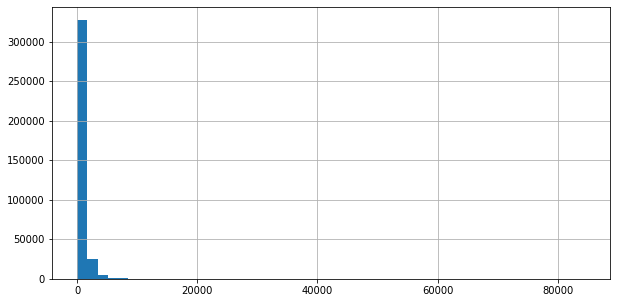

In [49]:
visits_log['session_duration_sec'].hist(bins=50,figsize=(10,5))

In [50]:
print('Одна сессия длится',visits_log['session_duration_sec'].mode()[0].round(), 'секунд')

Одна сессия длится 60 секунд


### На нормальное не похоже. Тогда берем моду (значение, которое встречается чаще всего) ,а не медиану

## Ответ: одна сессия длится 60 секунд (мода - значение которое встречается чаще всего)
Для сравнения - медиана - 644 секунды

## Кроме того, удержание, ltv и roi нужно посчитать с разбивкой по месячным когортам, по источникам и по устройствам.

### Как часто люди возвращаются?

In [51]:
display(visits_log)

,Device,End Ts,Source Id,Start Ts,Uid,session_year,session_month,session_week,session_date,session_year_month,session_year_week,session_duration_sec
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,2017-12-01,2017-12-14,1080
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,2018-02-01,2018-02-15,1680
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,2017-07-01,2017-06-29,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,2018-05-01,2018-05-17,1440
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27,2017-12-01,2017-12-21,0
...,...,...,...,...,...,...,...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539,2017,7,30,2017-07-29,2017-07-01,2017-07-27,19
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586,2018,1,4,2018-01-25,2018-01-01,2018-01-25,19
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294,2018,3,9,2018-03-03,2018-03-01,2018-03-01,19
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485,2017,11,44,2017-11-02,2017-11-01,2017-11-02,19


## Возвращаемость. Retention rate по когортам
### Выделим когорты. Сохраним дату первой активности в каждый визит

In [52]:
first_activity_date = visits_log.groupby(['Uid'])['session_date'].min()
first_activity_date.name = 'first_activity_date'
visits_log = visits_log.join(first_activity_date,on='Uid')

### Выделим из столбцов session_date и first_activity_date месяцы

In [53]:
visits_log['activity_month'] = visits_log['session_date'].astype('datetime64[M]')
visits_log['first_activity_month'] = visits_log['first_activity_date'].astype('datetime64[M]')

### Посчитаем lifetime пользователя в рамках когорты

In [54]:
visits_log['cohort_lifetime'] = visits_log['activity_month'] - visits_log['first_activity_month'] 
visits_log['cohort_lifetime'] = visits_log['cohort_lifetime'] / np.timedelta64(1,'M')
visits_log['cohort_lifetime'] = visits_log['cohort_lifetime'].round().astype(int)

### Сгруппируем данные по когорте и lifetime. Посчитаем для когорты количество активных пользователей на определенную неделю

In [55]:
cohorts = visits_log.groupby(['first_activity_month','cohort_lifetime']).agg({'Uid':'nunique'}).reset_index()
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_activity_month','Uid']]
initial_users_count = initial_users_count.rename(columns={'Uid':'cohort_users'})
cohorts = cohorts.merge(initial_users_count,on='first_activity_month')
display(cohorts)
cohorts['retention'] = cohorts['Uid']/cohorts['cohort_users']
retention_pivot = cohorts.pivot_table(index='first_activity_month',columns='cohort_lifetime',values='retention',aggfunc='sum')
retention_pivot.fillna('')

,first_activity_month,cohort_lifetime,Uid,cohort_users
0,2017-06-01,0,13259,13259
1,2017-06-01,1,1043,13259
2,2017-06-01,2,713,13259
3,2017-06-01,3,814,13259
4,2017-06-01,4,909,13259
...,...,...,...,...
73,2018-03-01,1,861,20589
74,2018-03-01,2,557,20589
75,2018-04-01,0,15709,15709
76,2018-04-01,1,760,15709


cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_activity_month,,,,,,,,,,,,
2017-06-01,1.0,0.0786635,0.0537748,0.0613923,0.0685572,0.0714232,0.0610152,0.0577721,0.0523418,0.0508334,0.0406516,0.0449506
2017-07-01,1.0,0.0560883,0.0512938,0.0561644,0.0582192,0.0481735,0.0453577,0.0457382,0.0388128,0.0286149,0.0274734,
2017-08-01,1.0,0.076908,0.0628622,0.062764,0.0500933,0.0440035,0.0363422,0.0394853,0.0278951,0.0260289,,
2017-09-01,1.0,0.0854885,0.069205,0.0507064,0.0393918,0.0378352,0.0358597,0.0241858,0.0228089,,,
2017-10-01,1.0,0.078608,0.0522385,0.0389575,0.0342611,0.0322208,0.0213651,0.0203642,,,,
2017-11-01,1.0,0.078281,0.0441133,0.0386817,0.0337272,0.0234146,0.0217998,,,,,
2017-12-01,1.0,0.0558018,0.0379927,0.0311065,0.0202628,0.0190359,,,,,,
2018-01-01,1.0,0.0597153,0.0393388,0.0249735,0.020244,,,,,,,
2018-02-01,1.0,0.0570798,0.0254539,0.0200928,,,,,,,,


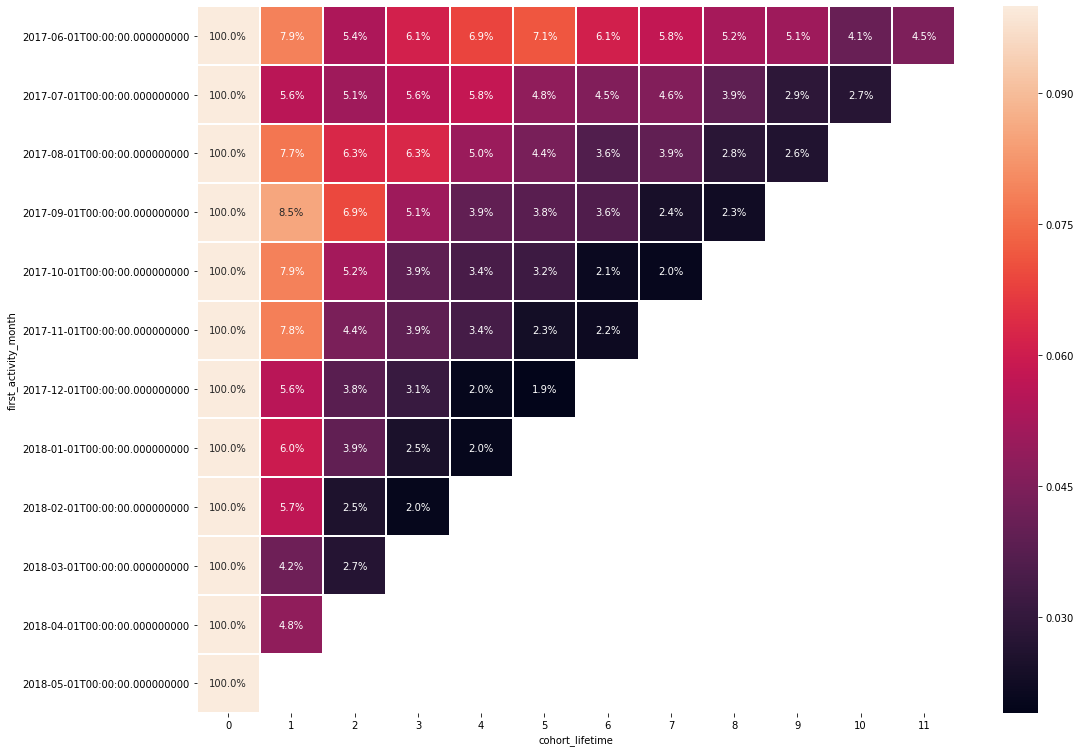

In [56]:
plt.figure(figsize=(17,13))
sns.heatmap(retention_pivot, vmax=0.1, annot=True, fmt='.1%', linewidth=1);

## Выводы. Retention rate по когортам
### RR на 2-й месяц
- Когорты 1, 3, 4, 5 и 6  имеют самую высокую возвращаемость на 2-й месяц. В июне, августе, сентябре, октябре и ноябре RR второго месяца составляет 7,7-8,5%.
- Когорта 2, июль 2017 года, почему-то имеет RR 2-го месяца намного ниже - 5,6%.
- Когорты 7-11 (декабрь-апрель) имеют RR 2-го месяца на уровне 4,2-6,0%. Это заметно ниже чем RR когорты первого полугодия. Есть какой-то фактор, который отразился на возвращаемости.

### RR на 3-й месяц и далее

- Самая высокая возвращаемость  у 1 когоры. Она держится на уровне 4,1-4,5% даже на 10 и 11 месяц
- Остальные когорты роняют возвращаемость до такого уровня на 6 месяце и ранее

### В начале жизни сервис чувствовал себя лучше - ранние последователи более лояльны. В новых когортах лояльность ниже и падает

# Возвращаемость. Retention rate по источникам

In [57]:
dimentions = ['Source Id', 'first_activity_month']
cohorts = visits_log.groupby(dimentions + ['cohort_lifetime']).agg({'Uid':'nunique'}).reset_index()
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][dimentions + ['Uid']]
initial_users_count = initial_users_count.rename(columns={'Uid':'cohort_users'})
cohorts = cohorts.merge(initial_users_count,on=dimentions)
cohorts['retention'] = cohorts['Uid']/cohorts['cohort_users']
display(cohorts)
retention_pivot = cohorts.pivot_table(index=dimentions,columns='cohort_lifetime',values='retention',aggfunc='sum')

display(retention_pivot.fillna(''))

,Source Id,first_activity_month,cohort_lifetime,Uid,cohort_users,retention
0,1,2017-06-01,0,972,972,1.000000
1,1,2017-06-01,1,188,972,0.193416
2,1,2017-06-01,2,126,972,0.129630
3,1,2017-06-01,3,141,972,0.145062
4,1,2017-06-01,4,156,972,0.160494
...,...,...,...,...,...,...
559,10,2018-03-01,1,36,981,0.036697
560,10,2018-03-01,2,14,981,0.014271
561,10,2018-04-01,0,472,472,1.000000
562,10,2018-04-01,1,26,472,0.055085


cohort_lifetime                  0          1          2          3   \
Source Id first_activity_month                                         
1         2017-06-01            1.0   0.193416    0.12963   0.145062   
          2017-07-01            1.0   0.105937  0.0908033  0.0931315   
          2017-08-01            1.0   0.214905   0.140381   0.135182   
          2017-09-01            1.0   0.180608   0.138783   0.108365   
          2017-10-01            1.0   0.179194  0.0980156  0.0655442   
...                             ...        ...        ...        ...   
10        2018-01-01            1.0  0.0456853  0.0304569  0.0139594   
          2018-02-01            1.0  0.0473506  0.0191657   0.011274   
          2018-03-01            1.0  0.0366972  0.0142712              
          2018-04-01            1.0  0.0550847                         
          2018-05-01            1.0                                    

cohort_lifetime                        4          5          6          7   \
Source Id first_activity_month                                               
1         2017-06-01             0.160494     0.1893    0.15535   0.140947   
          2017-07-01             0.117579   0.101281  0.0756694  0.0919674   
          2017-08-01             0.107452  0.0901213   0.067591  0.0762565   
          2017-09-01            0.0731939  0.0608365  0.0665399  0.0418251   
          2017-10-01            0.0589296   0.057727  0.0330728  0.0378833   
...                                   ...        ...        ...        ...   
10        2018-01-01            0.0126904                                    
          2018-02-01                                                         
          2018-03-01                                                         
          2018-04-01                                                         
          2018-05-01                                                         

cohort_lifetime                        8          9          10        11  
Source Id first_activity_month                                             
1         2017-06-01             0.113169   0.134774   0.103909  0.113169  
          2017-07-01            0.0733411  0.0454016  0.0465658            
          2017-08-01            0.0519931    0.05026                       
          2017-09-01            0.0256654                                  
          2017-10-01                                                       
...                                   ...        ...        ...       ...  
10        2018-01-01                                                       
          2018-02-01                                                       
          2018-03-01                                                       
          2018-04-01                                                       
          2018-05-01                                                       

[100 rows x 12 columns]

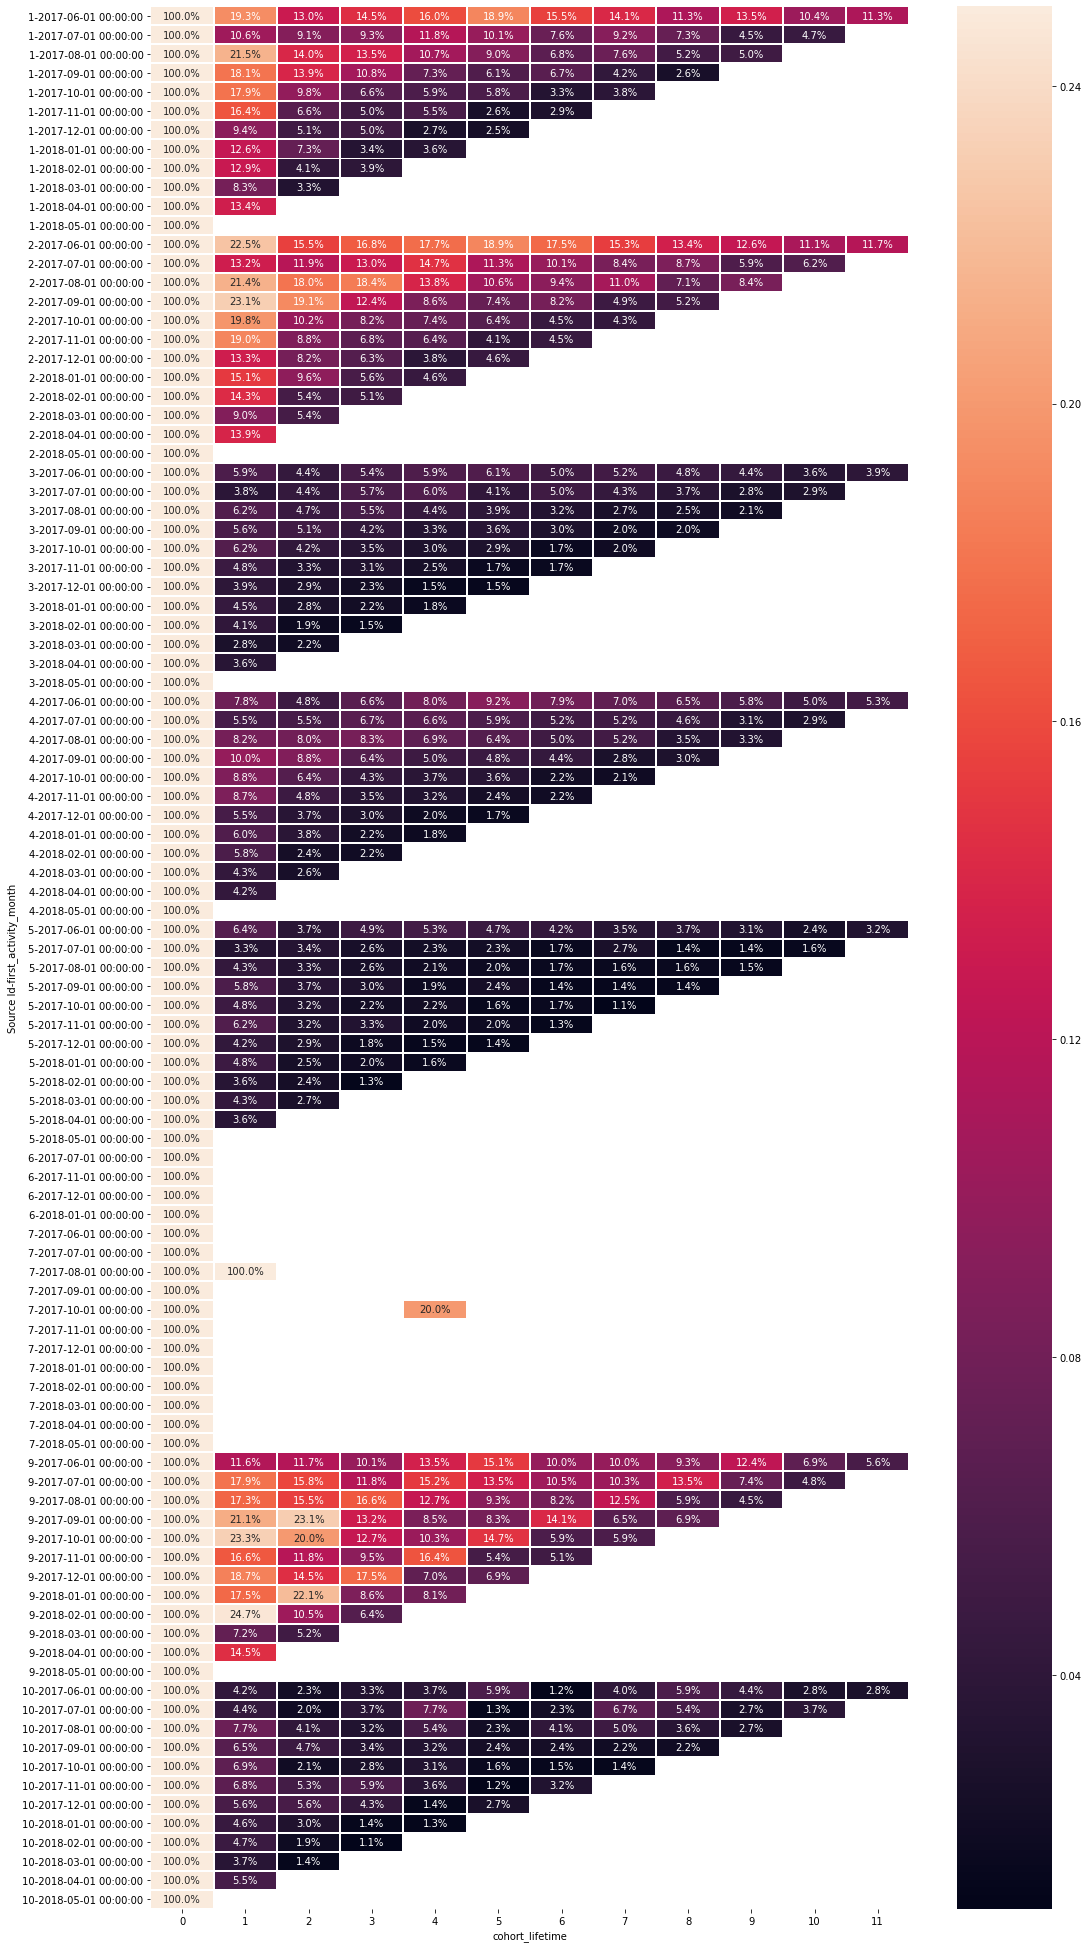

In [58]:
plt.figure(figsize=(17,35))
sns.heatmap(retention_pivot, vmax=0.25, annot=True, fmt='.1%', linewidth=1);

# Выводы. Возвращаемость. Retention rate по источникам
Сравним источники по возвращаемости 1 когорты (2017-06-01) на 1 месяц
- 1 источник - 19,3%
- 2 источник - 22,5%
- 3 источник - 5,9%
- 4 источник - 7,8%
- 5 источник - 6,4%
- 6 источник - 
- 7 источник - 
- 9 источник - 11,6%
- 10 источник - 4,2%


Сравним источники по возвращаемости 1 когорты (2017-06-01) на 11 месяц
- 1 источник - 11,3%
- 2 источник - 11,7%
- 3 источник - 3,9%
- 4 источник - 5,3%
- 5 источник - 3,2%
- 6 источник - 
- 7 источник - 
- 9 источник - 5,6%
- 10 источник - 2,8%

# Комментарий для маркетологов
- 2, 1 и 9 источник приводят самых лояльных пользователей. Эти источники рекомендованы для роста вложений
- 10, 5 и 3 источник приводят наименее лояльных пользователей

# Возвращаемость по устройствам

In [59]:
dimentions = ['Device', 'first_activity_month']
cohorts = visits_log.groupby(dimentions + ['cohort_lifetime']).agg({'Uid':'nunique'}).reset_index()
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][dimentions + ['Uid']]
initial_users_count = initial_users_count.rename(columns={'Uid':'cohort_users'})
cohorts = cohorts.merge(initial_users_count,on=dimentions)
cohorts['retention'] = cohorts['Uid']/cohorts['cohort_users']
display(cohorts)
retention_pivot = cohorts.pivot_table(index=dimentions,columns='cohort_lifetime',values='retention',aggfunc='sum')

display(retention_pivot.fillna(''))

,Device,first_activity_month,cohort_lifetime,Uid,cohort_users,retention
0,desktop,2017-06-01,0,9761,9761,1.000000
1,desktop,2017-06-01,1,833,9761,0.085340
2,desktop,2017-06-01,2,593,9761,0.060752
3,desktop,2017-06-01,3,671,9761,0.068743
4,desktop,2017-06-01,4,741,9761,0.075914
...,...,...,...,...,...,...
151,touch,2018-03-01,1,253,6381,0.039649
152,touch,2018-03-01,2,174,6381,0.027268
153,touch,2018-04-01,0,4991,4991,1.000000
154,touch,2018-04-01,1,220,4991,0.044079


cohort_lifetime                0          1          2          3          4   \
Device  first_activity_month                                                    
desktop 2017-06-01            1.0  0.0853396   0.060752   0.068743  0.0759144   
        2017-07-01            1.0  0.0609966  0.0558419  0.0609966  0.0646478   
        2017-08-01            1.0  0.0809396  0.0660403   0.067651  0.0544966   
        2017-09-01            1.0  0.0882629  0.0746906  0.0559112  0.0413999   
        2017-10-01            1.0  0.0829223  0.0550106  0.0401062  0.0369086   
        2017-11-01            1.0  0.0804312   0.044811  0.0400417  0.0338318   
        2017-12-01            1.0  0.0526544  0.0383532  0.0306067  0.0200975   
        2018-01-01            1.0  0.0621165  0.0403568  0.0261244   0.021317   
        2018-02-01            1.0  0.0601181  0.0268189   0.020018              
        2018-03-01            1.0  0.0435054  0.0270608                         
        2018-04-01            1.0  0.0510289                                    
        2018-05-01            1.0                                               
touch   2017-06-01            1.0  0.0659371  0.0396717  0.0473324  0.0585499   
        2017-07-01            1.0  0.0479658  0.0436966  0.0489704  0.0479658   
        2017-08-01            1.0  0.0711731  0.0575823  0.0554363  0.0407725   
        2017-09-01            1.0  0.0849406  0.0615624  0.0442237  0.0372102   
        2017-10-01            1.0  0.0733758  0.0490446  0.0373248  0.0307006   
        2017-11-01            1.0  0.0777466  0.0449619  0.0363977   0.035461   
        2017-12-01            1.0  0.0666197  0.0384507  0.0333803  0.0201408   
        2018-01-01            1.0  0.0584212  0.0387575  0.0225135  0.0185238   
        2018-02-01            1.0  0.0524465  0.0225608  0.0208028              
        2018-03-01            1.0   0.039649  0.0272685                         
        2018-04-01            1.0  0.0440793                                    
        2018-05-01            1.0                                               

cohort_lifetime                      5          6          7          8   \
Device  first_activity_month                                               
desktop 2017-06-01            0.0818564  0.0672062  0.0642352  0.0588055   
        2017-07-01            0.0518686   0.050043  0.0497208  0.0419888   
        2017-08-01            0.0468456  0.0374497  0.0405369  0.0314094   
        2017-09-01            0.0422535  0.0384123  0.0257789  0.0238156   
        2017-10-01            0.0350117  0.0229256  0.0223836              
        2017-11-01            0.0242933  0.0224055                         
        2017-12-01            0.0200975                                    
        2018-01-01                                                         
        2018-02-01                                                         
        2018-03-01                                                         
        2018-04-01                                                         
        2018-05-01                                                         
touch   2017-06-01            0.0552668  0.0549932  0.0459644  0.0426813   
        2017-07-01              0.04445  0.0376695  0.0379206  0.0349071   
        2017-08-01            0.0400572  0.0354077  0.0396996   0.019671   
        2017-09-01            0.0315605  0.0323398  0.0204559  0.0216248   
        2017-10-01            0.0276433  0.0183439   0.016051              
        2017-11-01            0.0214104  0.0202061                         
        2017-12-01            0.0169014                                    
        2018-01-01                                                         
        2018-02-01                                                         
        2018-03-01                                                         
        2018-04-01                                                   

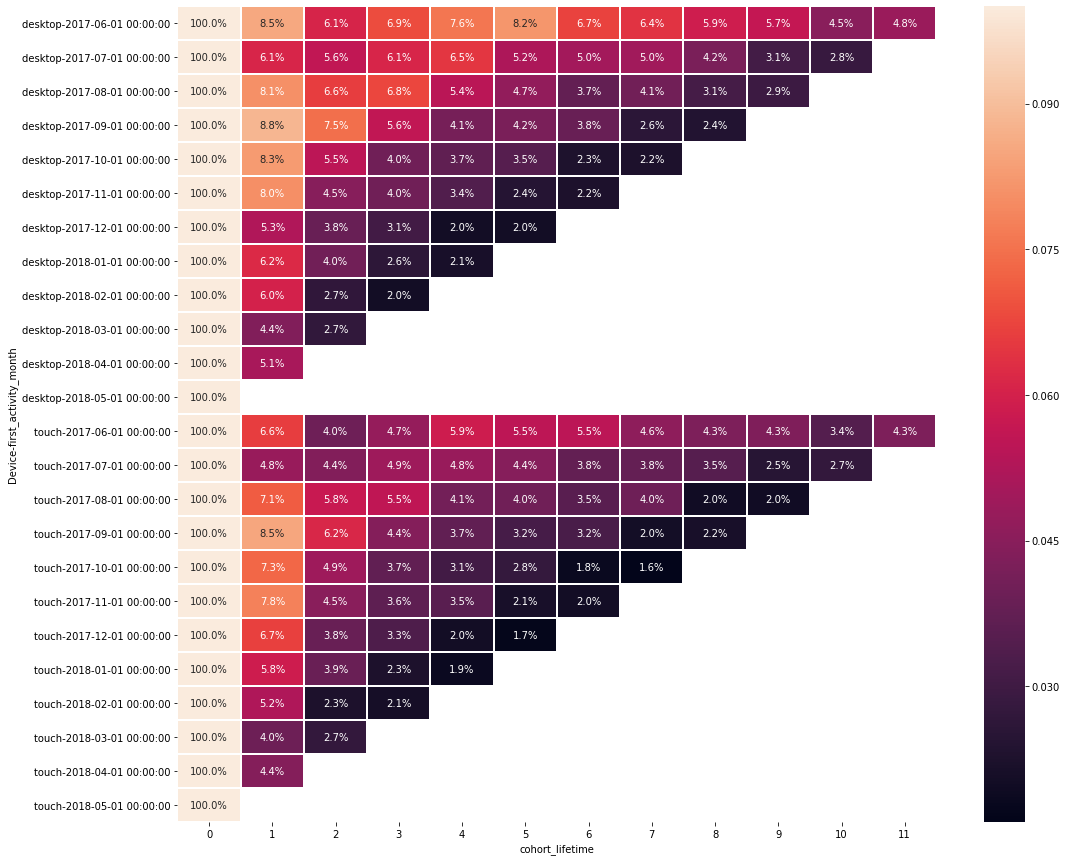

In [60]:
plt.figure(figsize=(17,15))
sns.heatmap(retention_pivot, annot=True, vmax=0.1, fmt='.1%', linewidth=1);

# Возвращаемость по устройствам по первой когорте (2017-06-01)
- RR 1-го месяца: desktop = 8,5%, touch - 6,6%
- RR 11-го месяца: desktop = 4,8%, touch - 4,3%

# Комментарий для маркетологов
- В десктопе возвращаемость на 11 месяц жизни пользователя падает почти в 2 раза, по сравнению с первым месяцем. 
- Тем не менее, возвращаемость в десктопе все равно выше, чем в таче (4,8% дестктоп против 4,3% в таче)
- Это означает, что возвращаемость в десктопе менее устойчива, и ее требуется поддерживать.

### Строим профили пользователей. Aquisition - приобретение

In [61]:
costs = costs.rename(columns = {'dt': 'acquisition_date'})

In [62]:
users = (visits_log.sort_values(by = ['Uid', 'Start Ts'])
        .groupby('Uid')
         .agg({'Start Ts': 'first', 'Source Id': 'first', 'Device': 'first'})
         .rename(columns = {'Start Ts': 'acquisition_ts'}))
users['acquisition_date'] = users['acquisition_ts'].dt.date
users['acquisition_month'] = users['acquisition_ts'].astype('datetime64[M]')

In [63]:
users = users.rename(columns = {'Source Id': 'source_id', 'Device': 'device'})

In [64]:
users = (users.reset_index()
        .set_index(['source_id', 'acquisition_date'])
        .join(costs.set_index(['source_id', 'acquisition_date']), how = 'left'))

### Добавляем стоимость приобретения индивидуального пользователя

In [65]:
user_cost = (users.groupby(['source_id', 'acquisition_date'])
            .agg({'device': 'count', 'costs': 'max'})
            .rename(columns = {'device': 'users'}))
user_cost['acquisition_cost'] = user_cost['costs'] / user_cost['users']

users = users.join(user_cost[['acquisition_cost']], how = 'left').reset_index()

users = users.set_index('Uid')[['acquisition_ts', 'acquisition_date', 'acquisition_month',
                               'source_id', 'device', 'acquisition_cost']]

### Платящий пользователь или нет

In [66]:
users = users.join(orders_log.groupby('Uid').agg({'Buy Ts':'min'}).rename(columns = {'Buy Ts': 'first_purchase_dt'}), how='left')
users['payer'] = ~users['first_purchase_dt'].isna()
users.head(3)

,acquisition_ts,acquisition_date,acquisition_month,source_id,device,acquisition_cost,first_purchase_dt,payer
Uid,,,,,,,,
469568501030474895,2017-06-01 05:30:00,2017-06-01,2017-06-01,1,desktop,1.6,2017-09-11 00:06:00,True
618675438905551322,2017-06-01 02:37:00,2017-06-01,2017-06-01,1,touch,1.6,NaT,False
1074355127080856382,2017-06-01 09:21:00,2017-06-01,2017-06-01,1,desktop,1.6,2017-06-01 09:23:00,True


---------



# Маркетинг: Сколько денег потратили? Всего / на каждый источник / по времени
## Acquisition_costs, CAC, LTV


### Предварительная подготовка для джойна таблиц

In [67]:
orders_log = orders_log.rename(columns={'Revenue': 'revenue'})
orders_log['purchase_month'] = orders_log['Buy Ts'].astype('datetime64[M]')
orders_log['purchase_week'] = orders_log['Buy Ts'].dt.week
orders_log['purchase_day'] = orders_log['Buy Ts'].dt.date
display(orders_log)

,Buy Ts,revenue,Uid,purchase_month,purchase_week,purchase_day
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,22,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,22,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,22,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,22,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,22,2017-06-01
...,...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-01,22,2018-05-31
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-01,22,2018-05-31
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-01,22,2018-05-31
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-01,22,2018-05-31


## Acquisition_costs, CAC по источнику Source ID

In [68]:
dimensions=['source_id']

cohorts_2 = (users.groupby(dimensions)
          .agg({'payer': 'sum', 'acquisition_cost': 'sum'})
          .rename(columns = {'payer': 'cohort_size'})) #payer:sum - суммирует только payer == True

cohorts_2['cac'] = cohorts_2['acquisition_cost'] / cohorts_2['cohort_size']
display(cohorts_2)

,cohort_size,acquisition_cost,cac
source_id,,,
1,2899.0,20833.27,7.186364
2,3506.0,42806.04,12.209367
3,10473.0,141321.63,13.493901
4,10296.0,61073.60,5.931779
5,6931.0,51756.40,7.467378
6,0.0,0.00,NaN
7,1.0,0.00,0.000000
9,1088.0,5454.42,5.013254
10,1329.0,5821.12,4.380075


## Вывод: Сколько денег потратили на привлечение всего по источнику, на 1 пользователя:
- Источник 1 - на 2899 пользователей потратили 20833.27, или 7,186 на 1 пользователя
- Источник 2 - на 3506 пользователей потратили 42806.04, или 12.209 на 1 пользователя
- Источник 3 - на 10473 пользователя потратили 141321.63, или 13.493 на 1 пользователя
- Источник 4 - на 10296 пользователей потратили 61073.6, или 5.931 на 1 пользователя
- Источник 5 - на 6931 пользователей потратили 51756.40	, или 7.467 на 1 пользователя
- Источник 6 - на 0 пользователей потратили 0
- Источник 7 - на 1 пользователя потратили 0
- Источник 9 - на 1088 пользователей потратили 5454.42, или 5.013 на 1 пользователя
- Источник 10 - на 1329 пользователей потратили 5821.12, или 4.380 на 1 пользователя


## Наблюдаемые закономерности
- Самые дорогие источники в порядке убывания - 3,2,5,1.
- Самые дешевые - 10, 9 и 4.
- Самые большие когорты - по источнику 3 и 4. Количество пользователей в них - более 10000.
- Но так как источник 3 стоит в 2,5 раза дороже чем источник 4, то затраты на когорту по источнику 3 составляют львиную долю маркетингового бюджета.
- Возможно, стоит пересмотреть перераспределение затрат в более дешевые источники

# LTV по источнику source_id

In [69]:
## LTV по источнику source_id

ltv = orders_log.set_index('Uid').join(users, how='left')[['acquisition_month', 'source_id', 'device', 
                                                          'purchase_month', 'revenue']]
ltv['age_month'] = ((ltv['purchase_month'] - ltv['acquisition_month']) / np.timedelta64(1, 'M')).round().astype('int')

print(ltv['age_month'].unique())

dimensions=['source_id']

ltv = ltv.groupby(dimensions + ['age_month']).agg({'revenue': 'sum'})
ltv = pd.pivot_table(ltv, index=dimensions, columns = 'age_month', values='revenue', aggfunc='sum')
ltv = ltv.cumsum(axis=1)
display(ltv)
ltv=cohorts_2[['cohort_size']].join(ltv)
ltv = ltv.div(ltv['cohort_size'], axis=0).drop(columns=['cohort_size']) #делим все ячейки на соотве.когорту
cohorts_2[['cohort_size', 'cac']].join(ltv[range(0,6)].fillna(''))

[ 0  3  2  6  1  4  7  8  9  5 10 11]


age_month,0,1,2,3,4,5,6,7,8,9,10,11
source_id,,,,,,,,,,,,
1,14526.97,17140.96,18936.48,21671.35,23363.34,24477.57,25411.97,27620.09,28872.82,29742.26,30565.89,31090.55
2,17905.40,23964.41,30010.57,36507.70,39701.27,42175.52,43396.17,44177.89,44929.65,45882.69,46538.18,46923.61
3,37710.74,43624.93,46099.83,48337.15,50325.60,51704.48,52776.81,53356.70,53870.06,54165.19,54361.36,54511.24
4,37452.58,41909.47,44034.91,46115.83,47879.35,50028.65,52109.23,52823.36,53773.64,55139.66,55934.43,56696.83
5,28782.52,32204.98,34220.09,45093.00,46849.89,49004.13,50156.47,51081.77,51624.99,52408.14,52543.20,52624.02
7,1.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2374.56,3005.58,3577.62,4086.23,4543.02,4769.16,5046.23,5245.72,5521.73,5685.65,5743.88,5759.40
10,3554.47,3857.32,3984.61,4061.33,4233.47,4313.89,4385.47,4411.44,4415.72,4433.41,4441.23,4450.33


,cohort_size,cac,0,1,2,3,4,5
source_id,,,,,,,,
1,2899.0,7.186364,5.01103,5.91271,6.53207,7.47546,8.0591,8.44345
2,3506.0,12.209367,5.10707,6.83526,8.55977,10.4129,11.3238,12.0295
3,10473.0,13.493901,3.60076,4.16547,4.40178,4.61541,4.80527,4.93693
4,10296.0,5.931779,3.63759,4.07046,4.27689,4.479,4.65029,4.85904
5,6931.0,7.467378,4.15272,4.64651,4.93725,6.50599,6.75947,7.07028
6,0.0,NaN,,,,,,
7,1.0,0.000000,1.22,,,,,
9,1088.0,5.013254,2.1825,2.76248,3.28825,3.75573,4.17557,4.38342
10,1329.0,4.380075,2.67454,2.90242,2.9982,3.05593,3.18546,3.24597


## Вывод: CAC и LTV на 6 месяц по истонику Source id

source_id	- cac	/ LTV5
- 1 - 7.19 /	8.44
- 2	- 12.21 /	12.03
- 3	- 13.49 /	4.94
- 4	- 5.93 /	4.86
- 5	- 7.47 / 7.07
- 6	- NaN												
- 7	- 0.0	1.22											
- 9	- 5.01/ 4.38
- 10- 4.38 /3.25

# Окупаемость romi по источникам source id на 6 месяц жизни

In [70]:
romi = ltv[range(0,6)].div(cohorts_2['cac'], axis=0)

In [71]:
romi

,0,1,2,3,4,5
source_id,,,,,,
1,0.697297,0.822769,0.908954,1.040228,1.121444,1.174927
2,0.418291,0.559837,0.701083,0.852863,0.927469,0.985270
3,0.266843,0.308693,0.326205,0.342036,0.356107,0.365864
4,0.613237,0.686213,0.721014,0.755086,0.783961,0.819153
5,0.556115,0.622242,0.661176,0.871255,0.905200,0.946823
6,NaN,NaN,NaN,NaN,NaN,NaN
7,inf,NaN,NaN,NaN,NaN,NaN
9,0.435346,0.551036,0.655912,0.749159,0.832906,0.874366
10,0.610616,0.662642,0.684509,0.697689,0.727260,0.741076


## Вывод: Окупаемость источников на 6 месяц жизни:
* 1 источник - **окупается на 3 месяц**
* 2 источник - не окупается. Окупаемость на уровне 99% 
* 3 источник - не окупился. Окупаемость на уровне 37%
* 4 источник - не окупается. Окупаемость на уровне 82%
* 5 источник - не окупается. Окупаемость на уровне 95%
* 6 источник - нет данных
* 7 источник - нет данных
* 9 источник - не окупается. Окупаемость на уровне 87%
* 10 источник - не окупается. Окупаемость на уровне 74%

# Acquisition_costs и CAC по девайсам device

In [72]:
dimensions=['device']

cohorts_2 = (users.groupby(dimensions)
          .agg({'payer': 'sum', 'acquisition_cost': 'sum'})
          .rename(columns = {'payer': 'cohort_size'})) #payer:sum - суммирует только payer == True

cohorts_2['cac'] = cohorts_2['acquisition_cost'] / cohorts_2['cohort_size']
display(cohorts_2)

,cohort_size,acquisition_cost,cac
device,,,
desktop,29211.0,235065.750929,8.047165
touch,7312.0,94000.729071,12.855680


## Вывод: Сколько денег потратили на привлечение всего по платформе, на 1 пользователя

- Десктоп - на привлечение когорты в 29211 пользователей потрачено 235065.75. Привлечение 1 пользователя стоит 8.047)
- Тач. На привлечение когорты в 7312 пользователей потрачено 94000. Привлечение 1 пользователя стоит 12.855.

Пользователи тача дороже чем десктопные (12.855 против 8.047)

# LTV по девайсу на 6 месяц жизни

In [73]:
ltv = orders_log.set_index('Uid').join(users, how='left')[['acquisition_month', 'source_id', 'device', 
                                                          'purchase_month', 'revenue']]
ltv['age_month'] = ((ltv['purchase_month'] - ltv['acquisition_month']) / np.timedelta64(1, 'M')).round().astype('int')


dimensions=['device']


ltv = ltv.groupby(dimensions + ['age_month']).agg({'revenue': 'sum'})
ltv = pd.pivot_table(ltv, index=dimensions, columns = 'age_month', values='revenue', aggfunc='sum')
ltv = ltv.cumsum(axis=1)
display(ltv)
ltv=cohorts_2[['cohort_size']].join(ltv)
ltv = ltv.div(ltv['cohort_size'], axis=0).drop(columns=['cohort_size']) #делим все ячейки на соотве.когорту
cohorts_2[['cohort_size', 'cac']].join(ltv[range(0,6)])

age_month,0,1,2,3,4,5,6,7,8,9,10,11
device,,,,,,,,,,,,
desktop,117165.49,135607.88,148619.67,172017.89,181785.00,190170.28,196119.52,200374.65,203704.70,207245.48,209631.67,211329.77
touch,25142.97,30100.99,32245.66,33855.92,35112.16,36304.34,37164.05,38343.54,39305.13,40212.74,40497.72,40727.43


,cohort_size,cac,0,1,2,3,4,5
device,,,,,,,,
desktop,29211.0,8.047165,4.011006,4.642357,5.087798,5.888805,6.223169,6.510228
touch,7312.0,12.855680,3.438590,4.116656,4.409964,4.630186,4.801991,4.965036


-----
## Вывод: LTV по девайсу на 6 месяц
* desktop	-	6,65
* touch -	4,96
-------

# Acquisition_costs и CAC по девайсам по месяцам

In [74]:
dimensions=['device', 'acquisition_month']

cohorts_2 = (users.groupby(dimensions)
          .agg({'payer': 'sum', 'acquisition_cost': 'sum'})
          .rename(columns = {'payer': 'cohort_size'})) #payer:sum - суммирует только payer == True

cohorts_2['cac'] = cohorts_2['acquisition_cost'] / cohorts_2['cohort_size']
display(cohorts_2)

cohort_size  acquisition_cost        cac
device  acquisition_month                                          
desktop 2017-06-01              2387.0      13331.593539   5.585083
        2017-07-01              1918.0      13092.273058   6.826003
        2017-08-01              1390.0      10804.737425   7.773192
        2017-09-01              2416.0      17062.874916   7.062448
        2017-10-01              3800.0      25821.702858   6.795185
        2017-11-01              3454.0      28224.060514   8.171413
        2017-12-01              3276.0      28090.033524   8.574491
        2018-01-01              2464.0      23486.406889   9.531821
        2018-02-01              2484.0      22826.695839   9.189491
        2018-03-01              2239.0      21568.758064   9.633210
        2018-04-01              1544.0      15570.595908  10.084583
        2018-05-01              1839.0      15186.018395   8.257759
touch   2017-06-01               536.0       4683.406461   8.737699
        2017-07-01               540.0       5138.536942   9.515809
        2017-08-01               331.0       3984.432575  12.037561
        2017-09-01               642.0       7297.485084  11.366799
        2017-10-01               878.0      10501.177142  11.960338
        2017-11-01               808.0       9683.819486  11.984925
        2017-12-01               798.0      10215.996476  12.802001
        2018-01-01               655.0      10032.113111  15.316203
        2018-02-01               702.0       9881.014161  14.075519
        2018-03-01               599.0       8845.811936  14.767633
        2018-04-01               346.0       6698.684092  19.360359
        2018-05-01               477.0       7038.251605  14.755244

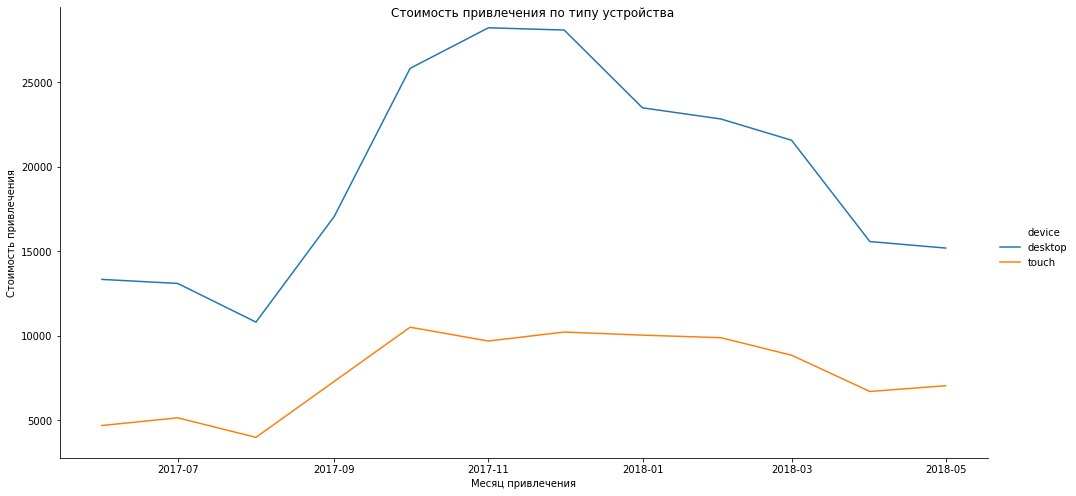

In [75]:
temp = cohorts_2.reset_index()
ax = sns.relplot(x='acquisition_month',y='acquisition_cost', 
            kind='line', hue='device', legend="full",height=7, aspect=2, data = temp)
ax.set(xlabel='Месяц привлечения', ylabel='Стоимость привлечения')
ax.fig.suptitle('Стоимость привлечения по типу устройства')
plt.show();

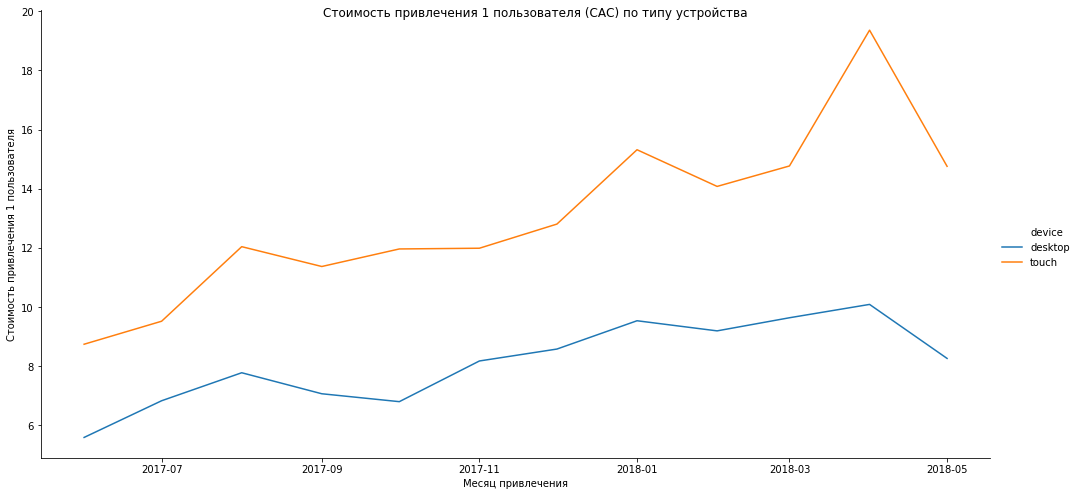

In [76]:
ax = sns.relplot(x='acquisition_month',y='cac', kind='line', hue='device', 
            legend="full",height=7, aspect=2, data = temp)
ax.set(xlabel='Месяц привлечения', ylabel='Стоимость привлечения 1 пользователя')
ax.fig.suptitle('Стоимость привлечения 1 пользователя (CAC) по типу устройства')
plt.show();

# LTV по девайсу и месяцам за 6 месяцев

In [77]:
ltv = orders_log.set_index('Uid').join(users, how='left')[['acquisition_month', 'source_id', 'device', 
                                                          'purchase_month', 'revenue']]
ltv['age_month'] = ((ltv['purchase_month'] - ltv['acquisition_month']) / np.timedelta64(1, 'M')).round().astype('int')

print(ltv['age_month'].unique())

dimensions=['device', 'acquisition_month']

ltv = ltv.groupby(dimensions + ['age_month']).agg({'revenue': 'sum'})
ltv = pd.pivot_table(ltv, index=dimensions, columns = 'age_month', values='revenue', aggfunc='sum')
ltv = ltv.cumsum(axis=1)
display(ltv)
ltv=cohorts_2[['cohort_size']].join(ltv)
ltv = ltv.div(ltv['cohort_size'], axis=0).drop(columns=['cohort_size']) #делим все ячейки на соотве.когорту
cohorts_2[['cohort_size', 'cac']].join(ltv[range(0,6)].fillna(''))

[ 0  3  2  6  1  4  7  8  9  5 10 11]


age_month                        0         1         2         3         4   \
device  acquisition_month                                                     
desktop 2017-06-01          8321.37  10636.30  11950.79  15650.46  19189.62   
        2017-07-01          7936.86   8731.14   9556.12  10283.37  10874.80   
        2017-08-01          5149.82   5982.92   6780.58   7575.55   8316.10   
        2017-09-01         10273.62  12858.60  14505.01  24722.92  25910.30   
        2017-10-01         15445.70  18127.18  19137.23  20052.85  21004.46   
        2017-11-01         13532.71  15620.66  16747.24  17951.01  18889.56   
        2017-12-01         14238.12  15626.74  19621.31  24381.92  25755.97   
        2018-01-01          8690.64  10219.35  11202.04  11449.00  11893.38   
        2018-02-01          9128.87  10827.13  11444.38  12275.84       NaN   
        2018-03-01          9360.18  10175.67  10872.78       NaN       NaN   
        2018-04-01          6650.41   8361.58       NaN       NaN       NaN   
        2018-05-01          8437.19   8440.61       NaN       NaN       NaN   
touch   2017-06-01          1236.12   1585.77   1735.97   1918.39   2319.82   
        2017-07-01          1938.03   2203.03   2486.95   2742.66   2998.22   
        2017-08-01          1084.99   1249.21   1452.90   1604.14   1673.63   
        2017-09-01          2083.58   3199.08   3663.30   3884.32   3985.42   
        2017-10-01          2916.62   4044.97   4361.94   4504.37   4596.23   
        2017-11-01          2999.08   3578.71   3794.98   3960.74   4130.93   
        2017-12-01          2618.88   2969.29   3173.02   3536.23   3619.75   
        2018-01-01          1906.37   2329.36   2511.43   2570.35   2653.44   
        2018-02-01          2383.76   2669.96   2715.90   2785.45       NaN   
        2018-03-01          2651.21   2819.72   2897.38       NaN       NaN   
        2018-04-01          1393.41   1520.97       NaN       NaN       NaN   
        2018-05-01          1930.92       NaN       NaN       NaN       NaN   

age_month                        5         6         7         8         9   \
device  acquisition_month                                                     
desktop 2017-06-01         21635.93  24819.57  26951.30  29056.78  31753.38   
        2017-07-01         11502.45  11959.84  12496.02  13108.38  13649.01   
        2017-08-01          8762.52   9186.91   9780.06  10058.38  10361.93   
        2017-09-01         27669.35  28457.25  28909.40  29243.29       NaN   
        2017-10-01         21869.22  22343.56  22885.48       NaN       NaN   
        2017-11-01         19532.34  20153.92       NaN       NaN       NaN   
        2017-12-01         27354.28       NaN       NaN       NaN       NaN   
        2018-01-01              NaN       NaN       NaN       NaN       NaN   
        2018-02-01              NaN       NaN       NaN       NaN       NaN   
        2018-03-01              NaN       NaN       NaN       NaN       NaN   
        2018-04-01              NaN       NaN       NaN       NaN       NaN   
        2018-05-01              NaN       NaN       NaN       NaN       NaN   
touch   2017-06-01          2697.99   3004.30   3143.38   3355.81   4140.85   
        2017-07-01          3168.65   3299.26   3533.38   3645.54   3695.94   
        2017-08-01          1760.11   1822.37   2475.45   3027.77   3099.94   
        2017-09-01          4136.42   4315.36   4354.59   4439.27       NaN   
        2017-10-01          4753.66   4858.23   4972.21       NaN       NaN   
        2017-11-01          4195.78   4272.80       NaN       NaN       NaN   
        2017-12-01          3803.57       NaN       NaN       NaN       NaN   
        2018-01-01              NaN       NaN       NaN       NaN       NaN   
        2018-02-01              NaN       NaN       NaN       NaN       NaN   
        2018-03-01              NaN       NaN       NaN       NaN       NaN   
        2018-04-01              NaN       NaN    

cohort_size        cac         0        1        2  \
device  acquisition_month                                                       
desktop 2017-06-01              2387.0   5.585083  3.486121  4.45593  5.00661   
        2017-07-01              1918.0   6.826003  4.138092  4.55221  4.98234   
        2017-08-01              1390.0   7.773192  3.704906  4.30426  4.87812   
        2017-09-01              2416.0   7.062448  4.252326  5.32227  6.00373   
        2017-10-01              3800.0   6.795185  4.064658  4.77031  5.03611   
        2017-11-01              3454.0   8.171413  3.917982  4.52248  4.84865   
        2017-12-01              3276.0   8.574491  4.346190  4.77007  5.98941   
        2018-01-01              2464.0   9.531821  3.527045  4.14746  4.54628   
        2018-02-01              2484.0   9.189491  3.675068  4.35875  4.60724   
        2018-03-01              2239.0   9.633210  4.180518  4.54474  4.85609   
        2018-04-01              1544.0  10.084583  4.307260  5.41553            
        2018-05-01              1839.0   8.257759  4.587923  4.58978            
touch   2017-06-01               536.0   8.737699  2.306194  2.95853  3.23875   
        2017-07-01               540.0   9.515809  3.588944  4.07969  4.60546   
        2017-08-01               331.0  12.037561  3.277915  3.77405  4.38943   
        2017-09-01               642.0  11.366799  3.245452  4.98299  5.70607   
        2017-10-01               878.0  11.960338  3.321891  4.60703  4.96804   
        2017-11-01               808.0  11.984925  3.711733   4.4291  4.69676   
        2017-12-01               798.0  12.802001  3.281805  3.72091  3.97622   
        2018-01-01               655.0  15.316203  2.910489  3.55627  3.83424   
        2018-02-01               702.0  14.075519  3.395670  3.80336   3.8688   
        2018-03-01               599.0  14.767633  4.426060  4.70738  4.83703   
        2018-04-01               346.0  19.360359  4.027197  4.39587            
        2018-05-01               477.0  14.755244  4.048050                     

                                 3        4        5  
device  acquisition_month                             
desktop 2017-06-01         6.55654  8.03922  9.06407  
        2017-07-01         5.36151  5.66986  5.99711  
        2017-08-01         5.45004  5.98281  6.30397  
        2017-09-01          10.233  10.7245  11.4525  
        2017-10-01         5.27707  5.52749  5.75506  
        2017-11-01         5.19717  5.46889  5.65499  
        2017-12-01         7.44259  7.86202   8.3499  
        2018-01-01         4.64651  4.82686           
        2018-02-01         4.94196                    
        2018-03-01                                    
        2018-04-01                                    
        2018-05-01                                    
touch   2017-06-01         3.57909  4.32802  5.03356  
        2017-07-01           5.079  5.55226  5.86787  
        2017-08-01         4.84634  5.05628  5.31755  
        2017-09-01         6.05034  6.20782  6.44302  
        2017-10-01         5.13026  5.23489  5.41419  
        2017-11-01         4.90191  5.11254   5.1928  
        2017-12-01         4.43137  4.53603  4.76638  
        2018-01-01          3.9242  4.05105           
        2018-02-01         3.96788                    
        2018-03-01                                    
        2018-04-01                                    
        2018-05-01

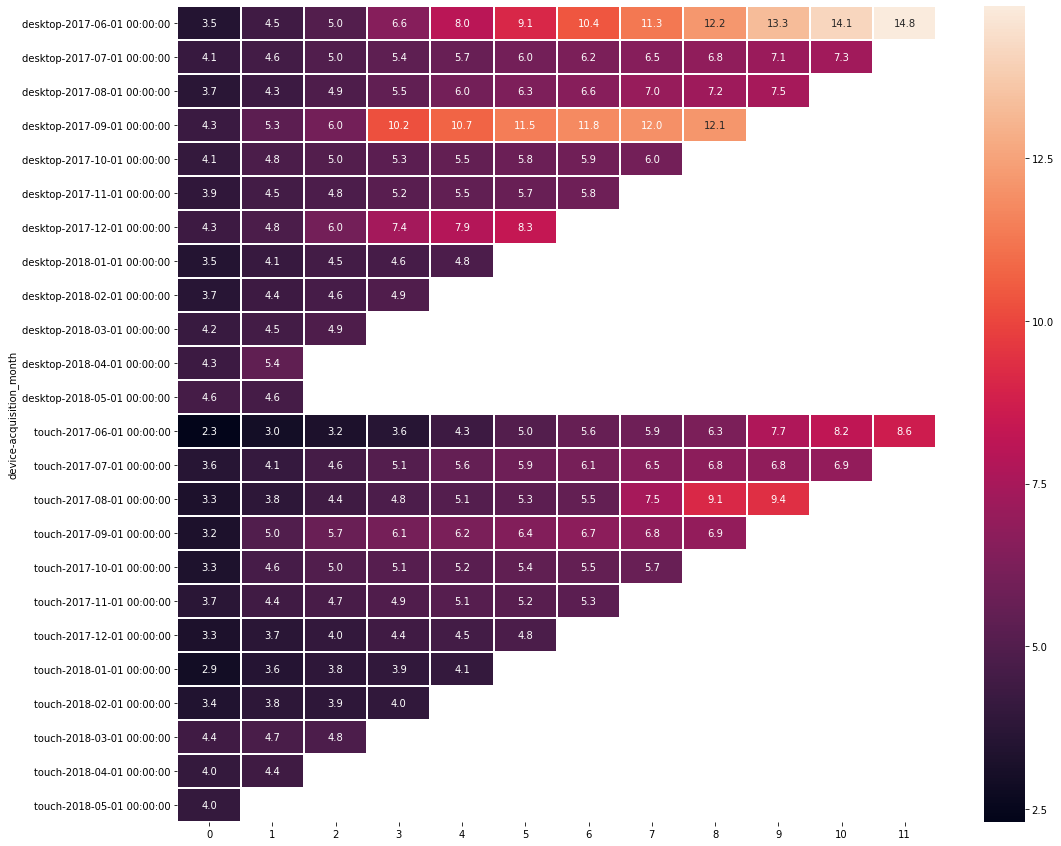

In [78]:
plt.figure(figsize=(17,15))
sns.heatmap(ltv, annot=True, fmt='.1f', linewidth=1);

In [79]:
cohorts_2[['cohort_size', 'cac']].join(ltv[range(7,12)].fillna(''))

cohort_size        cac        7        8        9  \
device  acquisition_month                                                      
desktop 2017-06-01              2387.0   5.585083  11.2909  12.1729  13.3026   
        2017-07-01              1918.0   6.826003  6.51513   6.8344  7.11627   
        2017-08-01              1390.0   7.773192  7.03601  7.23624  7.45463   
        2017-09-01              2416.0   7.062448  11.9658   12.104            
        2017-10-01              3800.0   6.795185  6.02249                     
        2017-11-01              3454.0   8.171413                              
        2017-12-01              3276.0   8.574491                              
        2018-01-01              2464.0   9.531821                              
        2018-02-01              2484.0   9.189491                              
        2018-03-01              2239.0   9.633210                              
        2018-04-01              1544.0  10.084583                              
        2018-05-01              1839.0   8.257759                              
touch   2017-06-01               536.0   8.737699  5.86451  6.26084  7.72547   
        2017-07-01               540.0   9.515809   6.5433    6.751  6.84433   
        2017-08-01               331.0  12.037561   7.4787  9.14734  9.36538   
        2017-09-01               642.0  11.366799  6.78285  6.91475            
        2017-10-01               878.0  11.960338  5.66311                     
        2017-11-01               808.0  11.984925                              
        2017-12-01               798.0  12.802001                              
        2018-01-01               655.0  15.316203                              
        2018-02-01               702.0  14.075519                              
        2018-03-01               599.0  14.767633                              
        2018-04-01               346.0  19.360359                              
        2018-05-01               477.0  14.755244                              

                                10       11  
device  acquisition_month                    
desktop 2017-06-01         14.1205  14.8319  
        2017-07-01         7.34257           
        2017-08-01                           
        2017-09-01                           
        2017-10-01                           
        2017-11-01                           
        2017-12-01                           
        2018-01-01                           
        2018-02-01                           
        2018-03-01                           
        2018-04-01                           
        2018-05-01                           
touch   2017-06-01         8.19535  8.62392  
        2017-07-01         6.90567           
        2017-08-01                           
        2017-09-01                           
        2017-10-01                           
        2017-11-01                           
        2017-12-01                           
        2018-01-01                           
        2018-02-01                           
        2018-03-01                           
        2018-04-01                           
        2018-05-01

# Десктоп. Когорта - CAC - LTV на 6 месяц по когортам, которые прожили 6 месяцев

- 2017-06-01	--5.59	--9.06  **(окупилась)**
- 2017-07-01	--6.83	--5.99  (не окупилась)
- 2017-08-01	--7.77	--6.30  (не окупилась)
- 2017-09-01	--7.06	--11.45 **(окупилась)**
- 2017-10-01	--6.80	--5.76  (не окупилась)
- 2017-11-01	--8.17	--5.65  (не окупилась)
- 2017-12-01	--8.57  --8.35  (не окупилась)

# Тач. Когорта - CAC - LTV на 6 месяц по когортам, которые прожили 6 месяцев

- 2017-06-01	--8.74	--5.03 (не окупилась)
- 2017-07-01	--9.52	--5.87 (не окупилась)
- 2017-08-01	--12.04	--5.32 (не окупилась)
- 2017-09-01	--11.37	--6.44 (не окупилась)
- 2017-10-01	--11.96	--5.41 (не окупилась)
- 2017-11-01	--11.98	--5.19 (не окупилась)
- 2017-12-01	--12.80	--4.77 (не окупилась)



# Acquisition_costs и CAC по месяцам

In [80]:
dimensions = ['acquisition_month']

cohorts_2 = (users.groupby(dimensions)
          .agg({'payer': 'sum', 'acquisition_cost': 'sum'})
          .rename(columns = {'payer': 'cohort_size'})) #payer:sum - суммирует только payer == True

cohorts_2['cac'] = cohorts_2['acquisition_cost'] / cohorts_2['cohort_size']
display(cohorts_2)

,cohort_size,acquisition_cost,cac
acquisition_month,,,
2017-06-01,2923.0,18015.00,6.163189
2017-07-01,2458.0,18230.81,7.416928
2017-08-01,1721.0,14789.17,8.593359
2017-09-01,3058.0,24360.36,7.966109
2017-10-01,4678.0,36322.88,7.764617
2017-11-01,4262.0,37907.88,8.894388
2017-12-01,4074.0,38306.03,9.402560
2018-01-01,3119.0,33518.52,10.746560
2018-02-01,3186.0,32707.71,10.266073


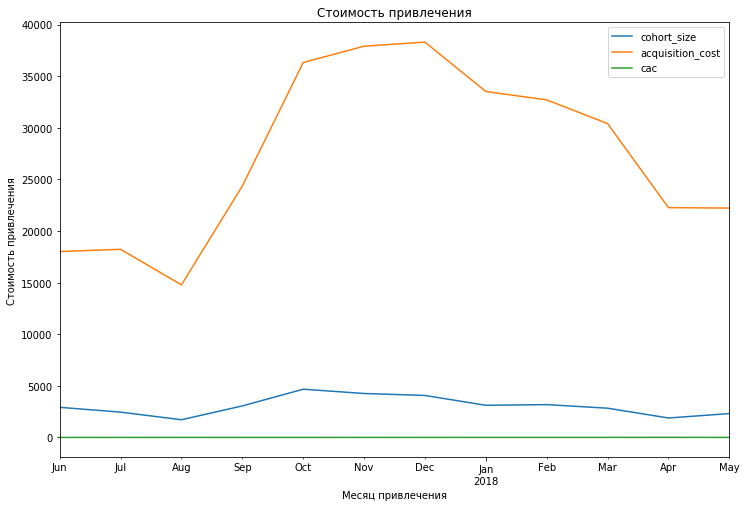

In [81]:
ax = cohorts_2.plot(figsize=(12,8))
ax.set(xlabel='Месяц привлечения', ylabel='Стоимость привлечения')
ax.set_title('Стоимость привлечения')
plt.show();

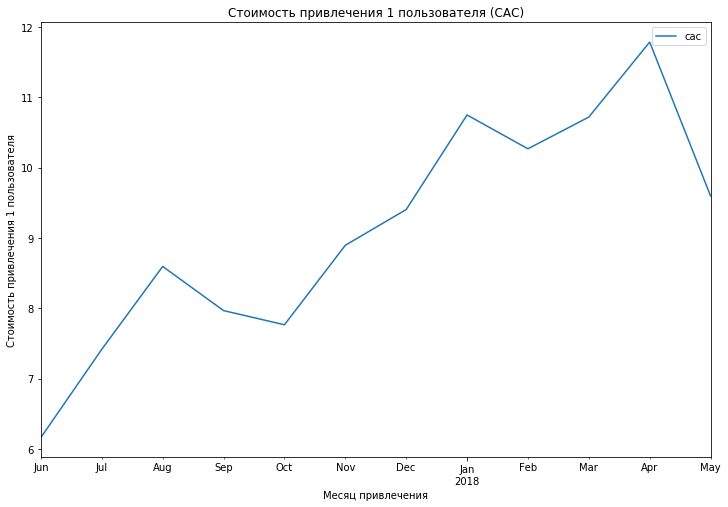

In [82]:
ax = cohorts_2.plot(y='cac',figsize=(12,8))
ax.set(xlabel='Месяц привлечения', ylabel='Стоимость привлечения 1 пользователя')
ax.set_title('Стоимость привлечения 1 пользователя (CAC)')
plt.show();

# LTV по месяцам acquisition_month за 6 месяцев

In [83]:
### LTV по месяцу привлечения acquisition_month

ltv = orders_log.set_index('Uid').join(users, how='left')[['acquisition_month', 'source_id', 'device', 
                                                          'purchase_month', 'revenue']]
ltv['age_month'] = ((ltv['purchase_month'] - ltv['acquisition_month']) / np.timedelta64(1, 'M')).round().astype('int')

print(ltv['age_month'].unique())

dimensions = ['acquisition_month']

ltv = ltv.groupby(dimensions + ['age_month']).agg({'revenue': 'sum'})
ltv = pd.pivot_table(ltv, index=dimensions, columns = 'age_month', values='revenue', aggfunc='sum')
ltv = ltv.cumsum(axis=1)
display(ltv[range(0,6)])

[ 0  3  2  6  1  4  7  8  9  5 10 11]


age_month,0,1,2,3,4,5
acquisition_month,,,,,,
2017-06-01,9557.49,12222.07,13686.76,17568.85,21509.44,24333.92
2017-07-01,9874.89,10934.17,12043.07,13026.03,13873.02,14671.10
2017-08-01,6234.81,7232.13,8233.48,9179.69,9989.73,10522.63
2017-09-01,12357.20,16057.68,18168.31,28607.24,29895.72,31805.77
2017-10-01,18362.32,22172.15,23499.17,24557.22,25600.69,26622.88
2017-11-01,16531.79,19199.37,20542.22,21911.75,23020.49,23728.12
2017-12-01,16857.00,18596.03,22794.33,27918.15,29375.72,31157.85
2018-01-01,10597.01,12548.71,13713.47,14019.35,14546.82,NaN
2018-02-01,11512.63,13497.09,14160.28,15061.29,NaN,NaN


In [84]:
ltv=cohorts_2[['cohort_size']].join(ltv)
ltv = ltv.div(ltv['cohort_size'], axis=0).drop(columns=['cohort_size']) #делим все ячейки на соотве.когорту
ltv[range(0,6)].fillna('')

,0,1,2,3,4,5
acquisition_month,,,,,,
2017-06-01,3.269754,4.181345,4.68244,6.01055,7.35869,8.32498
2017-07-01,4.017449,4.448401,4.89954,5.29944,5.64403,5.96871
2017-08-01,3.622783,4.202284,4.78413,5.33393,5.80461,6.11425
2017-09-01,4.040942,5.251040,5.94124,9.35489,9.77623,10.4008
2017-10-01,3.925250,4.739664,5.02334,5.24951,5.47257,5.69108
2017-11-01,3.878881,4.504779,4.81985,5.14119,5.40134,5.56737
2017-12-01,4.137703,4.564563,5.59507,6.85276,7.21054,7.64797
2018-01-01,3.397567,4.023312,4.39675,4.49482,4.66394,
2018-02-01,3.613506,4.236375,4.44453,4.72734,,


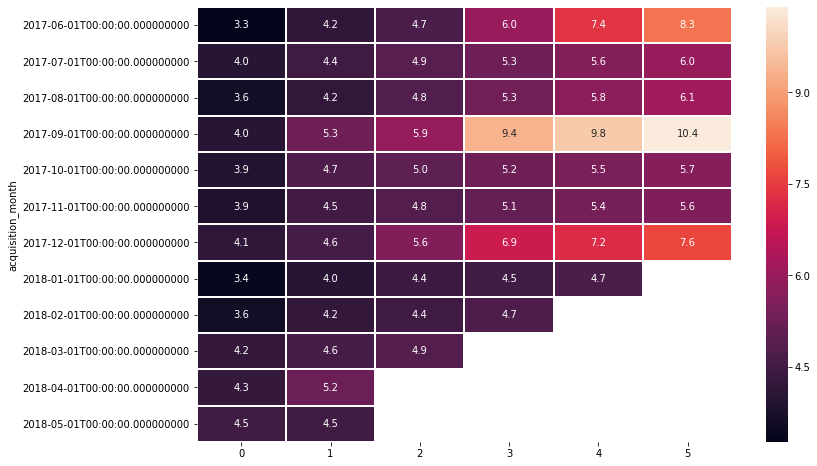

In [85]:
plt.figure(figsize=(12,8))
sns.heatmap(ltv[range(0,6)], annot=True, fmt='.1f', linewidth=1);

In [86]:
cohorts_2[['cohort_size', 'cac']].join(ltv[range(0,6)].fillna(''))

,cohort_size,cac,0,1,2,3,4,5
acquisition_month,,,,,,,,
2017-06-01,2923.0,6.163189,3.269754,4.181345,4.68244,6.01055,7.35869,8.32498
2017-07-01,2458.0,7.416928,4.017449,4.448401,4.89954,5.29944,5.64403,5.96871
2017-08-01,1721.0,8.593359,3.622783,4.202284,4.78413,5.33393,5.80461,6.11425
2017-09-01,3058.0,7.966109,4.040942,5.251040,5.94124,9.35489,9.77623,10.4008
2017-10-01,4678.0,7.764617,3.925250,4.739664,5.02334,5.24951,5.47257,5.69108
2017-11-01,4262.0,8.894388,3.878881,4.504779,4.81985,5.14119,5.40134,5.56737
2017-12-01,4074.0,9.402560,4.137703,4.564563,5.59507,6.85276,7.21054,7.64797
2018-01-01,3119.0,10.746560,3.397567,4.023312,4.39675,4.49482,4.66394,
2018-02-01,3186.0,10.266073,3.613506,4.236375,4.44453,4.72734,,


In [87]:
cohorts_2[['cohort_size', 'cac']].join(ltv[range(7,12)].fillna(''))

,cohort_size,cac,7,8,9,10,11
acquisition_month,,,,,,,
2017-06-01,2923.0,6.163189,10.2958,11.0888,12.2799,13.034,13.6935
2017-07-01,2458.0,7.416928,6.52132,6.81608,7.05653,7.24659,
2017-08-01,1721.0,8.593359,7.12116,7.60381,7.82212,,
2017-09-01,3058.0,7.966109,10.8777,11.0146,,,
2017-10-01,4678.0,7.764617,5.95504,,,,
2017-11-01,4262.0,8.894388,,,,,
2017-12-01,4074.0,9.402560,,,,,
2018-01-01,3119.0,10.746560,,,,,
2018-02-01,3186.0,10.266073,,,,,


----------
## CAC, LTV по когортам по месяцу привлечения на 6 месяц

* 2017-06-01 - 6.16 - 8,32 **(окупается)**
* 2017-07-01 - 7.41 - 5,97 (не окупается)
* 2017-08-01 - 8.59 - 6,11 (не окупается)
* 2017-09-01 - 7.97 - 10,4 **(окупается)**
* 2017-10-01 - 7.76 - 5,69 (не окупается)
* 2017-11-01 - 8.89 - 5,57 (не окупается)
* 2017-12-01 - 9.4 - 7,65 (не окупается)

--------

## Окупаемость romi по когортам

In [88]:
romi = ltv[range(0,6)].div(cohorts_2['cac'], axis=0)

In [89]:
romi.fillna('')

,0,1,2,3,4,5
acquisition_month,,,,,,
2017-06-01,0.530530,0.678439,0.759742,0.975235,1.19397,1.35076
2017-07-01,0.541659,0.599763,0.660589,0.714506,0.760966,0.804742
2017-08-01,0.421579,0.489015,0.556724,0.620704,0.675476,0.711509
2017-09-01,0.507267,0.659173,0.745815,1.17434,1.22723,1.30564
2017-10-01,0.505530,0.610418,0.646952,0.676081,0.704809,0.732951
2017-11-01,0.436104,0.506474,0.541898,0.578026,0.607275,0.625942
2017-12-01,0.440061,0.485460,0.595059,0.728819,0.766869,0.813393
2018-01-01,0.316154,0.374381,0.409131,0.418257,0.433994,
2018-02-01,0.351985,0.412658,0.432934,0.460481,,


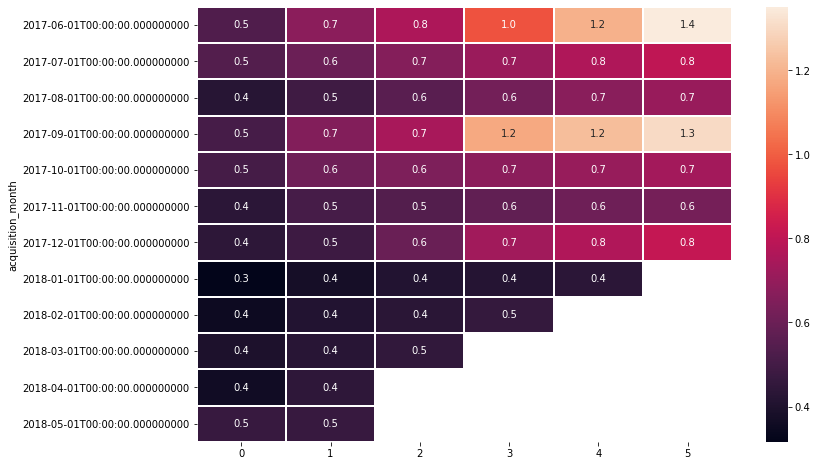

In [90]:
plt.figure(figsize=(12,8))
sns.heatmap(romi, annot=True, fmt='.1f', linewidth=1);

---------
## Когорты окупаются (romi > 1) по состоянию на 6 месяцев жизни:
* 2017-06-01 - **на 4 месяце. На 6 месяце romi 1,4**
* 2017-07-01 - не окупилась. romi 0,8
* 2017-08-01 - не окупилась. romi 0,7
* 2017-09-01 - **на 3 месяце. romi 1,3**
* 2017-10-01 - не окупилась. romi 0,7
* 2017-11-01 - не окупилась. romi 0,6
* 2017-12-01 - не окупилась. romi 0,8

----------

## Для каждого пользователя считаем основным первый источник и устройство, с которых он пришел в текущий месяц

## Рассчитаем покупки, MAU, платящее MAU и revenue по месяцам и по типу устройства
## Какой средний чек? 
Средний чек это сумма_всех_денег_за_период/количество_уникальных_покупателей_за_период
Периодом может быть день, неделя, месяц. Это не тот чек, который на кассе пробивают.

In [91]:
# для каждого пользователя считаем основным первый источник и устройство, с которых он пришел в текущий месяц
# (это наш временной интерсвал)
report = (visits_log.sort_values(by=['Uid', 'Start Ts'])
         .groupby(['Uid', 'session_year_month'])
         .agg({'Source Id': 'first', 'Device': 'first'}))

#присоединяем покупки

report = visits_log.merge(orders_log.groupby(['Uid', 'purchase_month']).agg({'revenue': 'sum', 'Buy Ts': 'count'}),
                     left_on = ['Uid', 'session_year_month'],
                     right_on= ['Uid', 'purchase_month'],
                     how='left'
                     ).rename(columns = {'Buy Ts': 'purchases'})

#группируем
report = (report.groupby(['session_year_month', 'Device'])
          .agg({'Uid': 'nunique', 'purchases': 'sum', 'revenue': ['count', 'sum']}))
report.columns = ['MAU', 'purchases', 'paying MAU', 'revenue']
report['average_check'] = report['revenue'] / report['paying MAU']
report

MAU  purchases  paying MAU    revenue  \
session_year_month Device                                             
2017-06-01         desktop   9761     4345.0        2786   26319.70   
                   touch     3655      583.0         480    1980.78   
2017-07-01         desktop  10145     5354.0        2537   34717.74   
                   touch     4223      831.0         659    4771.50   
2017-08-01         desktop   8611     5393.0        1907   30443.10   
                   touch     3132      483.0         375    2498.09   
2017-09-01         desktop  13509    11033.0        3653   99969.80   
                   touch     5679      992.0         785    5409.14   
2017-10-01         desktop  21286    13991.0        6256   99885.91   
                   touch     8856     2876.0        1446   32554.60   
2017-11-01         desktop  24439    14433.0        7065   91606.95   
                   touch     8913     2876.0        1681   24408.34   
2017-12-01         desktop  23294    22639.0        7190  403319.95   
                   touch     8785     2647.0        1769   11020.93   
2018-01-01         desktop  20350    13573.0        5046   78171.10   
                   touch     8741     1817.0        1265    7324.02   
2018-02-01         desktop  20574    19799.0        5490  120711.09   
                   touch     8590     1959.0        1426    8645.62   
2018-03-01         desktop  19574    15786.0        5795  133488.82   
                   touch     8303     2600.0        1357   29361.42   
2018-04-01         desktop  14844    11389.0        3752   95233.09   
                   touch     6387     1110.0         703   15059.99   
2018-05-01         desktop  14312    23646.0        4761  121441.36   
                   touch     6647     1631.0        1054    7792.10   

                            average_check  
session_year_month Device                  
2017-06-01         desktop       9.447128  
                   touch         4.126625  
2017-07-01         desktop      13.684564  
                   touch         7.240516  
2017-08-01         desktop      15.963870  
                   touch         6.661573  
2017-09-01         desktop      27.366493  
                   touch         6.890624  
2017-10-01         desktop      15.966418  
                   touch        22.513555  
2017-11-01         desktop      12.966306  
                   touch        14.520131  
2017-12-01         desktop      56.094569  
                   touch         6.230034  
2018-01-01         desktop      15.491696  
                   touch         5.789739  
2018-02-01         desktop      21.987448  
                   touch         6.062847  
2018-03-01         desktop      23.035172  
                   touch        21.637008  
2018-04-01         desktop      25.381954  
                   touch        21.422461  
2018-05-01         desktop      25.507532  
                   touch         7.392884

In [92]:
temp = report.reset_index()
temp

,session_year_month,Device,MAU,purchases,paying MAU,revenue,average_check
0,2017-06-01,desktop,9761,4345.0,2786,26319.70,9.447128
1,2017-06-01,touch,3655,583.0,480,1980.78,4.126625
2,2017-07-01,desktop,10145,5354.0,2537,34717.74,13.684564
3,2017-07-01,touch,4223,831.0,659,4771.50,7.240516
4,2017-08-01,desktop,8611,5393.0,1907,30443.10,15.963870
5,2017-08-01,touch,3132,483.0,375,2498.09,6.661573
6,2017-09-01,desktop,13509,11033.0,3653,99969.80,27.366493
7,2017-09-01,touch,5679,992.0,785,5409.14,6.890624
8,2017-10-01,desktop,21286,13991.0,6256,99885.91,15.966418
9,2017-10-01,touch,8856,2876.0,1446,32554.60,22.513555


In [93]:
temp.groupby('Device')['paying MAU'].mean().round(2)

Device
desktop    4686.50
touch      1083.33
Name: paying MAU, dtype: float64

In [94]:
temp.groupby('Device')['average_check'].mean().round(2)

Device
desktop    21.91
touch      10.87
Name: average_check, dtype: float64

In [95]:
temp.groupby('Device')['purchases'].mean().round(2)

Device
desktop    13448.42
touch       1700.42
Name: purchases, dtype: float64

In [96]:
temp.groupby('Device')['revenue'].mean().round(2)

Device
desktop    111275.72
touch       12568.88
Name: revenue, dtype: float64

-------
## В среднем в месяц по устройствам:
- Платящее MAU: desktop    4686.50, touch      1083.33
- Средний чек: desktop    21.91, touch      10.87
- Покупки: desktop    13448.42, touch       1700.42
- revenue: desktop    111275.72, touch       12568.88

---------

## График MAU, purchases, paying MAU по платформе desktop

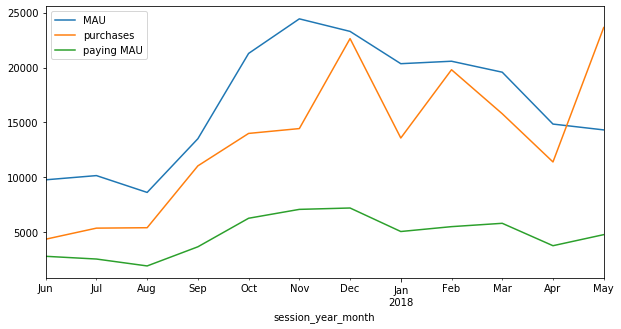

In [97]:
temp_desktop = temp[temp['Device'] == 'desktop'].drop(columns=['revenue', 'average_check'])
temp_desktop.plot('session_year_month', figsize=(10,5));

## График MAU, purchases, paying MAU по платформе touch

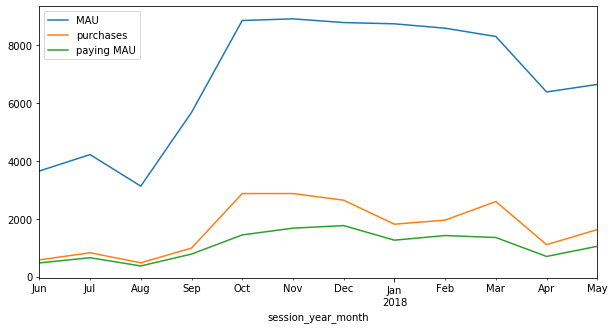

In [98]:
temp_touch = temp[temp['Device'] == 'touch'].drop(columns=['revenue', 'average_check'])
temp_touch.plot('session_year_month', figsize=(10,5));

## График среднего чека по месяцам

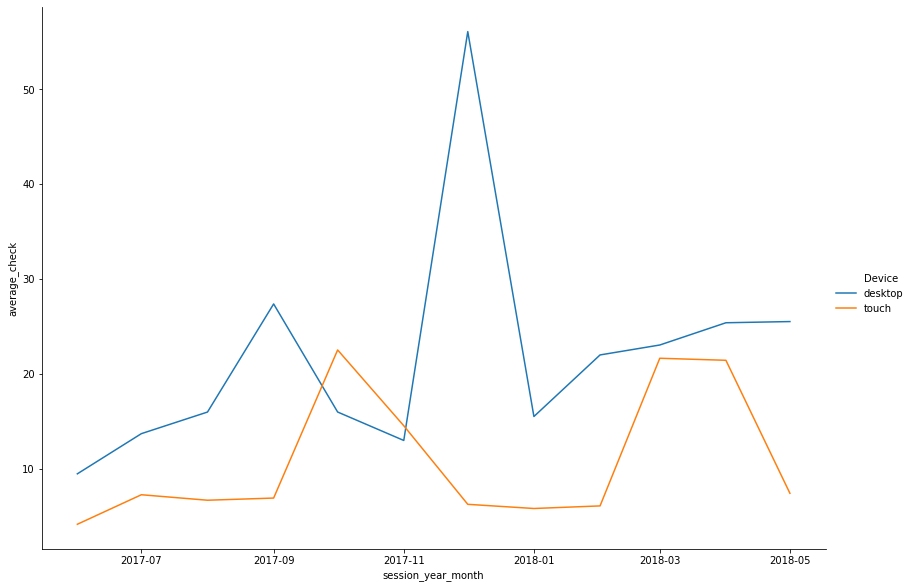

In [99]:
sns.relplot(x='session_year_month',y='average_check', kind='line', hue='Device', legend="full",height=8.27, aspect=11.7/8.27, data = temp);

## График revenue по месяцам

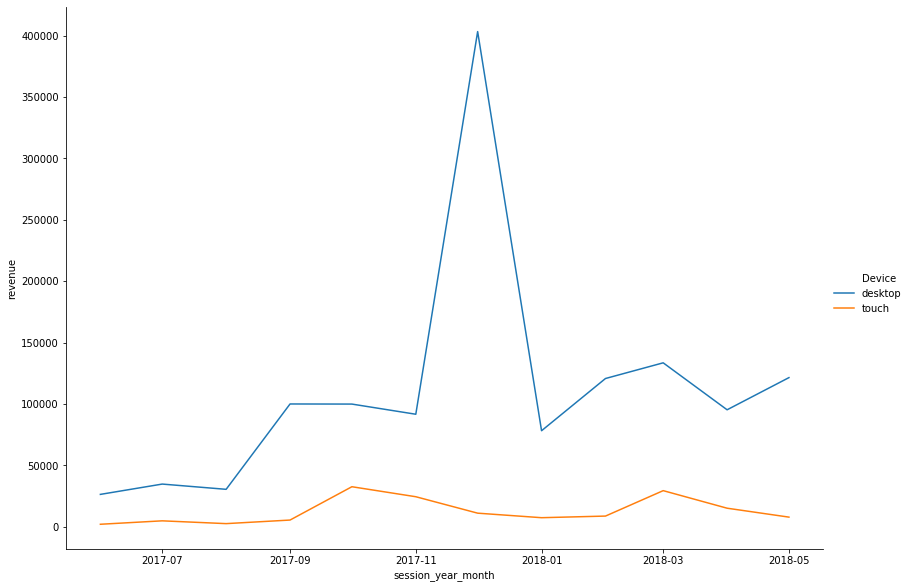

In [100]:
sns.relplot(x='session_year_month',y='revenue', kind='line', hue='Device', legend="full",height=8.27, aspect=11.7/8.27, data = temp);

## Сколько раз покупают за период?

## Сколько покупают в месяц?

In [101]:
report.groupby('Device')['purchases'].mean()

Device
desktop    13448.416667
touch       1700.416667
Name: purchases, dtype: float64

## В среднем в месяц совершают покупок: desktop - 13448,  touch - 1700

## Сколько покупают в неделю?

In [102]:
# для каждого пользователя считаем основным первый источник и устройство, с которых он пришел в текущую неделю
# (это наш временной интерсвал)
report_2 = (visits_log.sort_values(by=['Uid', 'Start Ts'])
         .groupby(['Uid', 'session_week'])
         .agg({'Source Id': 'first', 'Device': 'first'}))

#присоединяем покупки
report_2 = visits_log.merge(orders_log.groupby(['Uid', 'purchase_week']).agg({'Buy Ts': 'count'}),
                     left_on = ['Uid', 'session_week'],
                     right_on= ['Uid', 'purchase_week'],
                     how='left'
                     ).rename(columns = {'Buy Ts': 'purchases'})

#группируем
report_2 = (report_2.groupby(['session_week', 'Device'])
          .agg({'purchases': 'sum'}))
report_2.columns = ['purchases']
report_2

purchases
session_week Device            
1            desktop     1340.0
             touch        429.0
2            desktop     1189.0
             touch        260.0
3            desktop     1437.0
...                         ...
50           touch        408.0
51           desktop     1930.0
             touch        309.0
52           desktop     2493.0
             touch        391.0

[104 rows x 1 columns]

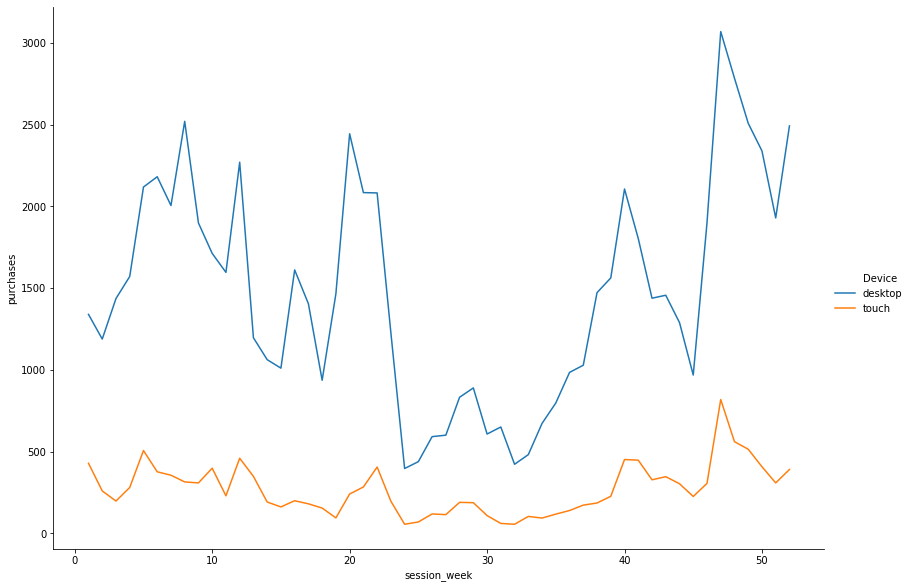

In [103]:
temp = report_2.reset_index()
sns.relplot(x='session_week',y='purchases', kind='line', hue='Device', legend="full",height=8.27, aspect=11.7/8.27, data = temp);

In [104]:
report_2.groupby('Device')['purchases'].mean()

Device
desktop    1478.980769
touch       269.288462
Name: purchases, dtype: float64

## В среднем в неделю совершают покупок: desktop - 1478,  touch  - 269

In [105]:
orders_log['purchase_day'] = orders_log['purchase_day'].astype('datetime64[D]')

In [106]:
# для каждого пользователя считаем основным первый источник и устройство, с которых он пришел в текущий день
# (это наш временной интерсвал)
report_3 = (visits_log.sort_values(by=['Uid', 'Start Ts'])
         .groupby(['Uid', 'session_date'])
         .agg({'Source Id': 'first', 'Device': 'first'}))

#присоединяем покупки
report_3 = visits_log.merge(orders_log.groupby(['Uid', 'purchase_day']).agg({'Buy Ts': 'count'}),
                     left_on = ['Uid', 'session_date'],
                     right_on= ['Uid', 'purchase_day'],
                     how='left'
                     ).rename(columns = {'Buy Ts': 'purchases'})

#группируем
report_3 = (report_3.groupby(['session_date', 'Device'])
          .agg({'purchases': 'sum'}))
report_3.columns = ['purchases']
report_3

purchases
session_date Device            
2017-06-01   desktop      114.0
             touch         16.0
2017-06-02   desktop      112.0
             touch         14.0
2017-06-03   desktop       52.0
...                         ...
2018-05-29   touch         30.0
2018-05-30   desktop      195.0
             touch         50.0
2018-05-31   desktop      601.0
             touch        120.0

[727 rows x 1 columns]

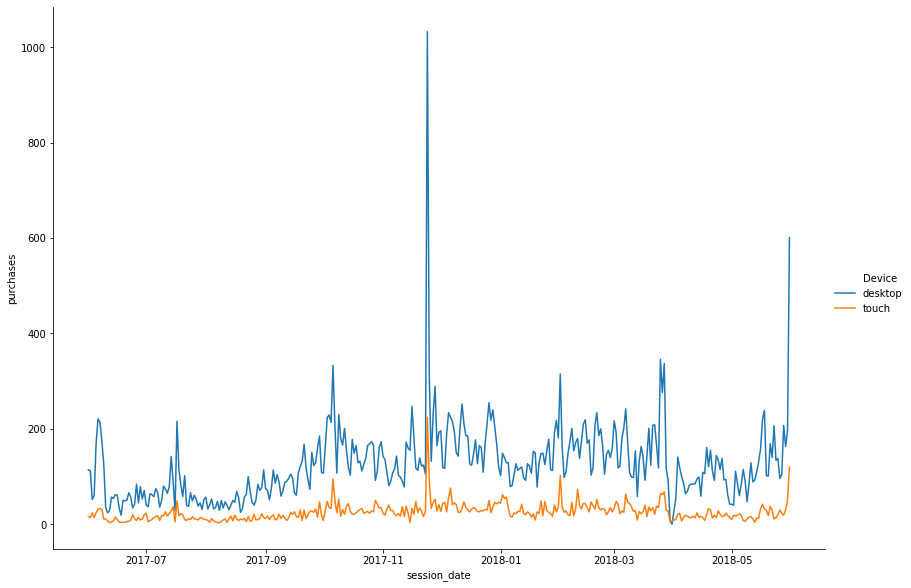

In [107]:
temp = report_3.reset_index()
sns.relplot(x='session_date',y='purchases', kind='line', hue='Device', legend="full",height=8.27, aspect=11.7/8.27, data = temp);

In [108]:
report_3.groupby('Device')['purchases'].mean()

Device
desktop    125.642857
touch       25.603306
Name: purchases, dtype: float64

## В среднем в день совершают покупок: desktop - 125,  touch - 25

---------
# Вывод: Сколько раз покупают за период?
*  В месяц : desktop - 13448, touch - 1700
*  В неделю: desktop - 1478, touch - 269
*  В день: desktop - 125,  touch - 25
---------------------

## Рассчитаем покупки, MAU, платящее MAU, revenue, средний чек по месяцам и по источнику

In [109]:
report_2 = (visits_log.sort_values(by=['Uid', 'Start Ts'])
         .groupby(['Uid', 'session_year_month'])
         .agg({'Source Id': 'first', 'Device': 'first'}))
report_2

#присоединяем покупки
report_2 = visits_log.merge(orders_log.groupby(['Uid', 'purchase_month']).agg({'revenue': 'sum', 'Buy Ts': 'count'}),
                     left_on = ['Uid', 'session_year_month'],
                     right_on= ['Uid', 'purchase_month'],
                     how='left'
                     ).rename(columns = {'Buy Ts': 'purchases'})

#группируем по источнику
report_2 = (report_2.groupby(['session_year_month', 'Source Id'])
          .agg({'Uid': 'nunique', 'purchases': 'sum', 'revenue': ['count', 'sum']}))
report_2.columns = ['MAU', 'purchases', 'paying MAU', 'revenue']

#добавим средний чек
report_2['average_check'] = report_2['revenue'] / report_2['paying MAU']
report_2 = report_2.round(2)
report_2

MAU  purchases  paying MAU   revenue  \
session_year_month Source Id                                          
2017-06-01         1           972     1227.0         600   9623.69   
                   2          1532      951.0         559   6685.32   
                   3          4226      881.0         764   3761.66   
                   4          3636      725.0         559   3753.35   
                   5          2903      851.0         546   3686.81   
...                            ...        ...         ...       ...   
2018-05-01         4          7275     1554.0        1097   6796.21   
                   5          4038     6670.0        1097  27146.38   
                   7             2        0.0           0      0.00   
                   9           753      141.0         100    594.31   
                   10          777      256.0         190    845.82   

                              average_check  
session_year_month Source Id                 
2017-06-01         1                  16.04  
                   2                  11.96  
                   3                   4.92  
                   4                   6.71  
                   5                   6.75  
...                                     ...  
2018-05-01         4                   6.20  
                   5                  24.75  
                   7                    NaN  
                   9                   5.94  
                   10                  4.45  

[102 rows x 5 columns]

## График purchases по месяцам и по источнику source id

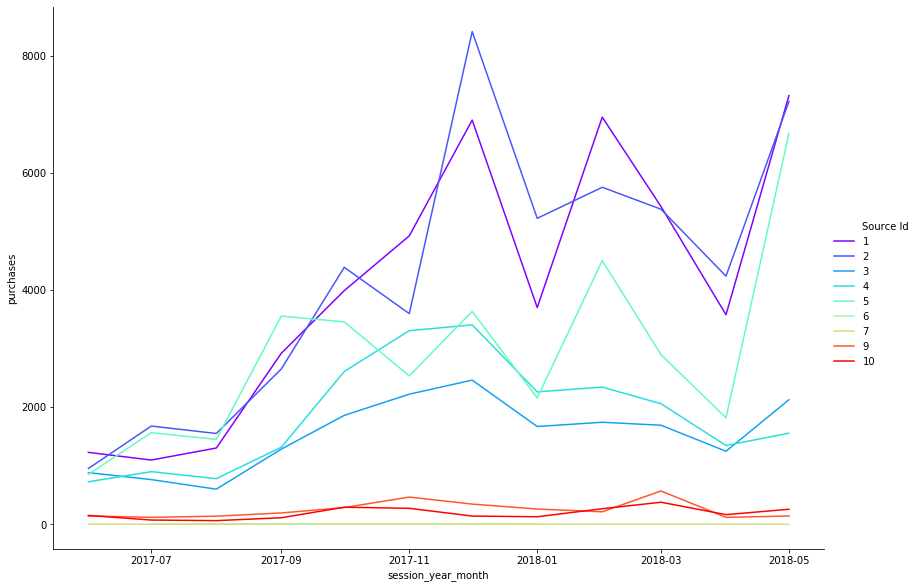

In [110]:
temp = report_2.reset_index()
sns.relplot(x='session_year_month',y='purchases', kind='line', hue='Source Id', legend="full",
            height=8.27, aspect=11.7/8.27, data = temp, palette='rainbow');

## Выводы по графику purchases по источнику

Больше всего покупок за период с декабря 2017 по май 2018 совершают пользователи из источников:
- 1, 2 источники: 4000-8000 покупок
- 5 источник: резко набирает количество покупок к маю 2018 - 3800-6000+
- 3,4 источник: количество покупок имеет нисходящий тренд 3000-1500
- 9,10 источники: имеют малое количество покупок

-------

## График MAU по месяцам и по источнику source id

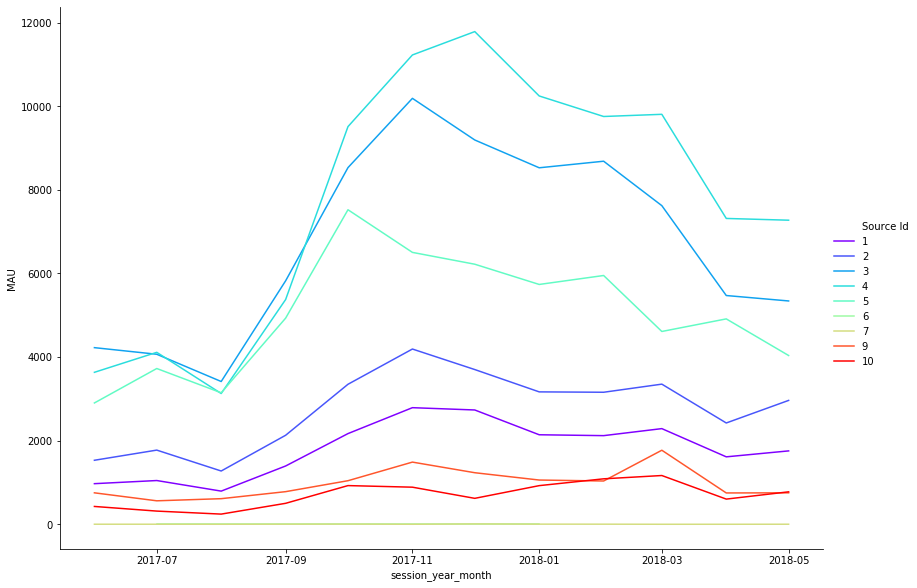

In [111]:
sns.relplot(x='session_year_month',y='MAU', kind='line', hue='Source Id', 
            legend="full",height=8.27, aspect=11.7/8.27, data = temp, palette='rainbow');

## Выводы по графику MAU по источнику
MAU в период с декабря 2017 по май 2018:
- 4,3,5 источники - имеют нисходящий тренд MAU, 12000-4000
- 2,1 источники - стабильный тренд 1800-3800
- 9,10 источники - стабильный тренд около 1000
-------

## График revenue по месяцам и по источнику source id

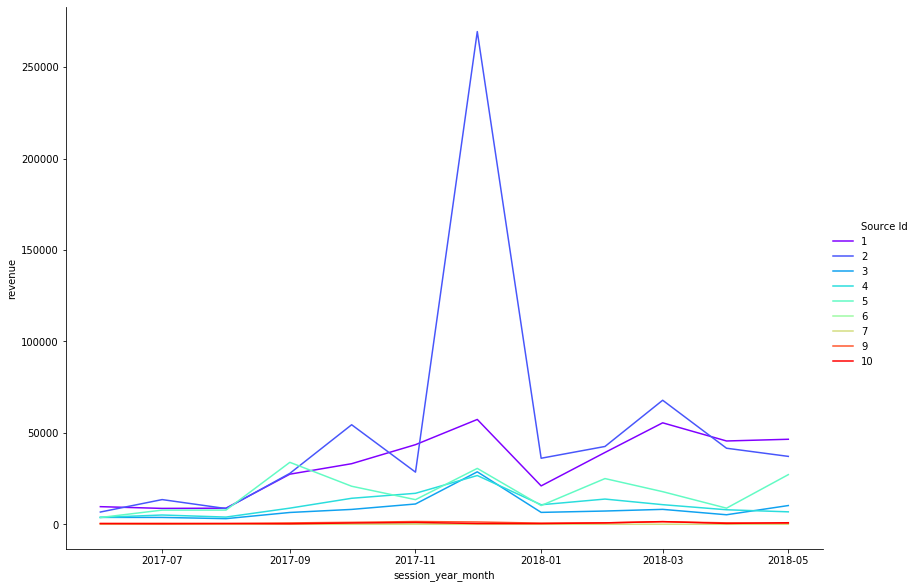

In [112]:
sns.relplot(x='session_year_month',y='revenue', kind='line', hue='Source Id', 
            legend="full",height=8.27, aspect=11.7/8.27, data = temp, palette='rainbow');

## Выводы графика revenue по источнику

- 2 источник имеет значительный пик в декабре - 250,000 revenue
- 1, 3, 4, 5, 6 источники держатся в пределах 5,000
- 9, 10 источники не приносят revenue
-----

## График среднего чека по месяцам и по источнику source id

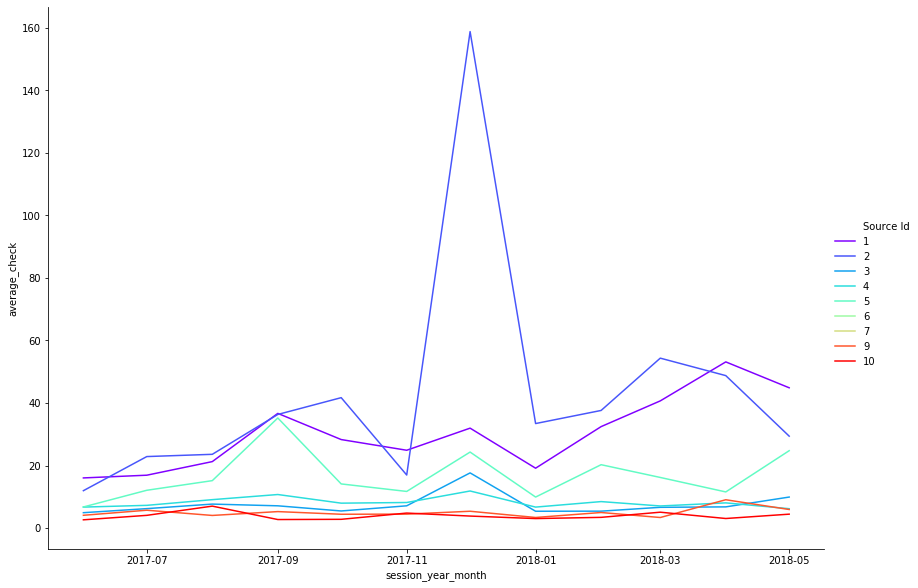

In [113]:
sns.relplot(x='session_year_month',y='average_check', kind='line', hue='Source Id', 
            legend="full",height=8.27, aspect=11.7/8.27, data = temp, palette='rainbow');

## Выводы по графику среднего чека по источнику
- 2 источник - имеет значимый пик среднего чека до 160
- 1 источник - средний чек 20-50
- остальные источники в среднем имеют чек ниже 20

-----

In [114]:
report_2.groupby('Source Id')['MAU'].mean().round()

Source Id
1     1819.0
2     2752.0
3     6759.0
4     7766.0
5     5018.0
6        1.0
7        3.0
9      987.0
10     707.0
Name: MAU, dtype: float64

## Среднее MAU по источнику
* 1  -   1819
* 2  -   2752
* 3  -   6759
* 4  -   7766
* 5  -   5018
* 6  -      1
* 7  -      3
* 9  -    987
* 10 -    707

In [115]:
report_2.groupby('Source Id')['paying MAU'].mean().round()

Source Id
1     1046.0
2     1045.0
3     1076.0
4     1285.0
5      980.0
6        0.0
7        0.0
9      183.0
10     155.0
Name: paying MAU, dtype: float64

## Среднее платящее MAU по источнику

- 1   -  1046.0
- 2   -  1045.0
- 3   -  1076.0
- 4   -  1285.0
- 5   -   980.0
- 6   -     0.0
- 7   -     0.0
- 9   -   183.0
- 10  -   155.0

## Общий вывод. Покупки, MAU, платящее MAU, revenue, средний чек по месяцам и по источнику

### Больше всего покупок за период с декабря 2017 по май 2018 совершают пользователи из источников:
- 1, 2 источники: 4000-8000 покупок
- 5 источник: резко набирает количество покупок к маю 2018 - 3800-6000+
- 3,4 источник: количество покупок имеет нисходящий тренд 3000-1500
- 9,10 источники: имеют малое количество покупок

### MAU в период с декабря 2017 по май 2018:
- 4,3,5 источники - имеют нисходящий тренд MAU, 12000-4000
- 2,1 источники - стабильный тренд 1800-3800
- 9,10 источники - стабильный тренд около 1000

### revenue 
- 2 источник имеет значительный пик в декабре - 250,000 revenue
- 1, 3, 4, 5, 6 источники держатся в пределах 5,000
- 9, 10 источники не приносят revenue

### средний чек 
- 2 источник - имеет значимый пик среднего чека до 160
- 1 источник - средний чек 20-50
- остальные источники в среднем имеют чек ниже 20

### Среднее MAU и среднее платящее MAU по источнику
- 1 - 1819 / 1046
- 2 - 2752 / 1045
- 3 - 6759 / 1076
- 4 - 7766 / 1285
- 5 - 5018 / 980
- 6 - 1
- 7 - 3
- 9 - 987 / 183
- 10 - 707 / 155

## Рекомендации:
- 1 и 2 источник наиболее предпочтительны по всем показателям. Больше всего покупок, revenue не ниже среднего, высокий средний чек, и отношение платящего MAU к MAU самое высокое - много пользователей платит.
Что можно сделать: 
- работать над увеличением MAU, привлекать больше из этих источников.
- 2 источник дает колоссальный вклад в revenue в декабре. Если удастся понять почему - возможно, получится прирастить revenue и по пользователям другого источника. Если не удастся понять почему - привлекать побольше пользователей этого источника к Новому Году.
- 5 источник многообещающе растит покупки, но имеет нисходящий тренд MAU. Этот источник стоит удерживать. 



## Когда люди начинают покупать?

In [116]:
users['start_buy_time'] = users['first_purchase_dt'] - users['acquisition_date']
users['start_buy_time_seconds'] = users.start_buy_time.dt.seconds
users['start_buy_time_days'] = users.start_buy_time.dt.days
users

,acquisition_ts,acquisition_date,acquisition_month,source_id,device,acquisition_cost,first_purchase_dt,payer,start_buy_time,start_buy_time_seconds,start_buy_time_days
Uid,,,,,,,,,,,
469568501030474895,2017-06-01 05:30:00,2017-06-01,2017-06-01,1,desktop,1.600000,2017-09-11 00:06:00,True,102 days 00:06:00,360.0,102.0
618675438905551322,2017-06-01 02:37:00,2017-06-01,2017-06-01,1,touch,1.600000,NaT,False,NaT,NaN,NaN
1074355127080856382,2017-06-01 09:21:00,2017-06-01,2017-06-01,1,desktop,1.600000,2017-06-01 09:23:00,True,0 days 09:23:00,33780.0,0.0
1292867924428534308,2017-06-01 12:53:00,2017-06-01,2017-06-01,1,desktop,1.600000,2017-06-01 16:47:00,True,0 days 16:47:00,60420.0,0.0
1548840741623289234,2017-06-01 01:18:00,2017-06-01,2017-06-01,1,desktop,1.600000,NaT,False,NaT,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
17550479715346067160,2018-05-31 22:00:00,2018-05-31,2018-05-01,10,touch,0.177778,NaT,False,NaT,NaN,NaN
17715613363403416471,2018-05-31 03:30:00,2018-05-31,2018-05-01,10,desktop,0.177778,NaT,False,NaT,NaN,NaN
18076428844159112818,2018-05-31 17:47:00,2018-05-31,2018-05-01,10,touch,0.177778,NaT,False,NaT,NaN,NaN


In [117]:
users['start_buy_time'].value_counts(ascending=False)

0 days 12:32:00      45
0 days 22:05:00      45
0 days 16:00:00      45
0 days 12:03:00      45
0 days 12:59:00      45
                     ..
21 days 17:18:00      1
28 days 15:16:00      1
182 days 13:36:00     1
40 days 20:24:00      1
0 days 00:00:00       1
Name: start_buy_time, Length: 11131, dtype: int64

In [118]:
users['start_buy_time_days'].describe()

count    36523.000000
mean        16.895901
std         47.071200
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max        363.000000
Name: start_buy_time_days, dtype: float64

# Выбросы
- Большой разброс между 75% процентилем - 2 дня, и максимумом - 363 дня.
- Для очистки от выбросов уберем из датасета значения с таймдельтой дня покупки более чем треть от разницы максимума и 75% процентиля (max - 75%)/3

In [119]:
users_clear = users.query('start_buy_time_days < 120')
users_clear

,acquisition_ts,acquisition_date,acquisition_month,source_id,device,acquisition_cost,first_purchase_dt,payer,start_buy_time,start_buy_time_seconds,start_buy_time_days
Uid,,,,,,,,,,,
469568501030474895,2017-06-01 05:30:00,2017-06-01,2017-06-01,1,desktop,1.600000,2017-09-11 00:06:00,True,102 days 00:06:00,360.0,102.0
1074355127080856382,2017-06-01 09:21:00,2017-06-01,2017-06-01,1,desktop,1.600000,2017-06-01 09:23:00,True,0 days 09:23:00,33780.0,0.0
1292867924428534308,2017-06-01 12:53:00,2017-06-01,2017-06-01,1,desktop,1.600000,2017-06-01 16:47:00,True,0 days 16:47:00,60420.0,0.0
2050423809815667474,2017-06-01 10:36:00,2017-06-01,2017-06-01,1,desktop,1.600000,2017-06-01 10:38:00,True,0 days 10:38:00,38280.0,0.0
3520273333047097992,2017-06-01 20:08:00,2017-06-01,2017-06-01,1,desktop,1.600000,2017-06-01 20:35:00,True,0 days 20:35:00,74100.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
14129427635584867187,2018-05-31 20:30:00,2018-05-31,2018-05-01,10,touch,0.177778,2018-05-31 20:32:00,True,0 days 20:32:00,73920.0,0.0
14350420740207733259,2018-05-31 10:15:00,2018-05-31,2018-05-01,10,desktop,0.177778,2018-05-31 10:15:00,True,0 days 10:15:00,36900.0,0.0
15116668155510764243,2018-05-31 22:47:00,2018-05-31,2018-05-01,10,desktop,0.177778,2018-05-31 22:50:00,True,0 days 22:50:00,82200.0,0.0


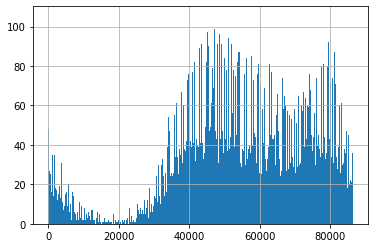

In [120]:
(users_clear.start_buy_time.dt.seconds).hist(bins=1000);

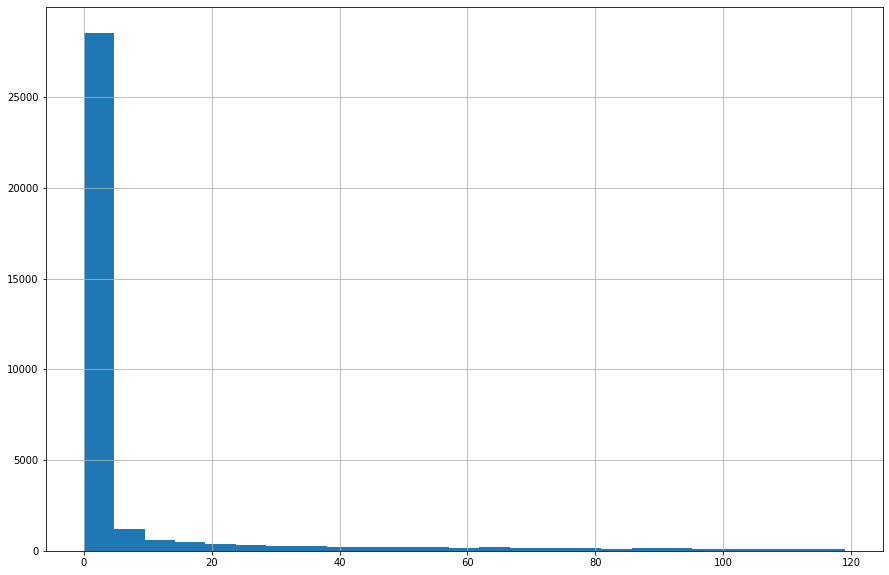

In [121]:
(users_clear.start_buy_time.dt.days).hist(bins=25, figsize=(15,10));

In [122]:
users_clear['start_buy_time'].describe()

count                      34582
mean      7 days 21:54:34.906598
std      20 days 13:39:52.865278
min              0 days 00:00:00
25%              0 days 13:24:00
50%              0 days 18:38:00
75%              1 days 12:36:00
max            119 days 23:08:00
Name: start_buy_time, dtype: object

In [123]:
users_clear['start_buy_time'].mode()

0   12:03:00
1   12:17:00
2   12:32:00
3   12:59:00
4   16:00:00
5   22:05:00
dtype: timedelta64[ns]

In [124]:
users_clear['start_buy_time'].median()

Timedelta('0 days 18:38:00')

-----
## Выводы: Когда люди начинают покупать?
### В среднем через: 7 days 21:54:34
### Самое часто встречающееся время: 0 days 12:03:00 - 0 days 22:05:00
### Медиана: 0 days 19:00:00
-----

# Общий вывод
--------

##  DAU, WAU, MAU
- DAU - 908
- WAU - 5716
- MAU - 23228


## Когорты окупаются (romi > 1) по состоянию на 6 месяцев жизни:
* 2017-06-01 - **на 4 месяце. На 6 месяце romi 1,4**
* 2017-07-01 - не окупилась. romi 0,8
* 2017-08-01 - не окупилась. romi 0,7
* 2017-09-01 - **на 3 месяце. romi 1,3**
* 2017-10-01 - не окупилась. romi 0,7
* 2017-11-01 - не окупилась. romi 0,6
* 2017-12-01 - не окупилась. romi 0,8

## CAC, LTV по когортам по месяцу привлечения на 6 месяц

* 2017-06-01 - 6.16 - 8,32 **(окупается)**
* 2017-07-01 - 7.41 - 5,97 (не окупается)
* 2017-08-01 - 8.59 - 6,11 (не окупается)
* 2017-09-01 - 7.97 - 10,4 **(окупается)**
* 2017-10-01 - 7.76 - 5,69 (не окупается)
* 2017-11-01 - 8.89 - 5,57 (не окупается)
* 2017-12-01 - 9.4 - 7,65 (не окупается)


## Когда люди начинают покупать?
- В среднем через: 7 days 21:54:34
- Самое часто встречающееся время: 0 days 12:03:00 - 0 days 22:05:00
- Медиана: 0 days 19:00:00

-----

#  Источники 
## Эффективность с точки зрения привлеченного DAU
Источники перечислены по убыванию эффективности
- 3 и 4 источники - 150-450.
- 5 Источник - 150-400 DAU.
- 1 и 2 Источники - 200 DAU.
- 9 и 10 Источники - менее 200 DAU. 
- Источники 6 и 7 - 0 DAU. Вероятно, не используются.

Комментарий: Распределение MAU по источникам такое же, как по DAU.
- 3 и 4 дают основной вклад в MAU - 6-10 тыс
- 5 тоже дает значимый вклад начиная с октября 2017 - 4-6 тыс
- 1 и 2 дают небольшой, но стабильный вклад - 2-3 тыс

### Источники, показывающие пики и дающие основной вклад (3,4,5,2,1), стоит развивать и использовать больше


## Покупки, MAU, платящее MAU, revenue, средний чек по источнику

## Покупки
Больше всего покупок за период с декабря 2017 по май 2018 совершают пользователи из источников:
- 1, 2 источники: 4000-8000 покупок
- 5 источник: резко набирает количество покупок к маю 2018 - 3800-6000+
- 3,4 источник: количество покупок имеет нисходящий тренд 3000-1500
- 9,10 источники: имеют малое количество покупок

## MAU в период с декабря 2017 по май 2018:
- 4,3,5 источники - имеют нисходящий тренд MAU, 12000-4000
- 2,1 источники - стабильный тренд 1800-3800
- 9,10 источники - стабильный тренд около 1000

## Revenue 
- 2 источник имеет значительный пик в декабре - 250,000 revenue
- 1, 3, 4, 5, 6 источники держатся в пределах 5,000
- 9, 10 источники не приносят revenue

## Cредний чек 
- 2 источник - имеет значимый пик среднего чека до 160
- 1 источник - средний чек 20-50
- остальные источники в среднем имеют чек ниже 20

## Среднее MAU и среднее платящее MAU по источнику
- 1 - 1819 / 1046
- 2 - 2752 / 1045
- 3 - 6759 / 1076
- 4 - 7766 / 1285
- 5 - 5018 / 980
- 6 - 1
- 7 - 3
- 9 - 987 / 183
- 10 - 707 / 155

## Рекомендации:
- 1 и 2 источник наиболее предпочтительны по всем показателям. Больше всего покупок, revenue не ниже среднего, высокий средний чек, и отношение платящего MAU к MAU самое высокое - много пользователей платит.
Что можно сделать: 
- работать над увеличением MAU, привлекать больше из этих источников.
- 2 источник дает колоссальный вклад в revenue в декабре. Если удастся понять почему - возможно, получится прирастить revenue и по пользователям другого источника. Если не удастся понять почему - привлекать побольше пользователей этого источника к Новому Году.
- 5 источник многообещающе растит покупки, но имеет нисходящий тренд MAU. Этот источник стоит удерживать. 



## CAC  и LTV за 6 месяцев. Сколько стоит привлечь 1 пользователя и сколько денег приносит пользователь

source_id	- cac	/ LTV
- 1 источник - 7.19 /	8.44
- 2	источник - 12.21 /	12.03
- 3	источник - 13.49 /	4.94
- 4	источник - 5.93 /	4.86
- 5	источник - 7.47 / 7.07
- 6	источник - NaN												
- 7	источник - 0.0	1.22											
- 9	источник - 5.01/ 4.38
- 10 источник - 4.38 /3.25
											


## Окупаемость источников romi на 6 месяц жизни

* 1 источник - **окупается на 3 месяц**
* 2 источник - не окупается. Окупаемость на уровне 99% 
* 3 источник - не окупился. Окупаемость на уровне 37%
* 4 источник - не окупается. Окупаемость на уровне 82%
* 5 источник - не окупается. Окупаемость на уровне 95%
* 6 источник - нет данных
* 7 источник - нет данных
* 9 источник - не окупается. Окупаемость на уровне 87%
* 10 источник - не окупается. Окупаемость на уровне 74%



## Возвращаемость. Retention rate 
Сравним источники по возвращаемости 1 когорты (2017-06-01) на 1 месяц
- 1 источник - 19,3%
- 2 источник - 22,5%
- 3 источник - 5,9%
- 4 источник - 7,8%
- 5 источник - 6,4%
- 6 источник - 
- 7 источник - 
- 9 источник - 11,6%
- 10 источник - 4,2%

Сравним источники по возвращаемости 1 когорты (2017-06-01) на 11 месяц
- 1 источник - 11,3%
- 2 источник - 11,7%
- 3 источник - 3,9%
- 4 источник - 5,3%
- 5 источник - 3,2%
- 6 источник - 
- 7 источник - 
- 9 источник - 5,6%
- 10 источник - 2,8%

## Комментарий для маркетологов
- 2, 1 и 9 источник приводят самых лояльных пользователей. Эти источники рекомендованы для роста вложений
- 10, 5 и 3 источник приводят наименее лояльных пользователей

## Напишите вывод: порекомендуйте маркетологам, куда и сколько им стоит вкладывать денег?
- Какие источники/платформы вы бы порекомендовали? 
- Объясните свой выбор: на какие метрики вы ориентируетесь? 
- Почему? 
- Какие выводы вы сделали, узнав значение метрик?

## Подход к выбору источников:
- выбираем только источники, которые окупаются или близки к окупаемости(romi >0,85)
- таких источников четыре: 1,2,5,9
- RR у 1,2,9 источников довольно хороший (11,6-22,5%), у 5 источника (всего 6,4%). Однако 5 источник близок к окупаемости romi, поэтому его оставим. И падает с течением времени (RR11/RR1) примерно одинаково. Корректировок тут не вносим.
- вклад в revenue должен быть весомым. Привлекаемые пользователи должны приносить деньги:  
-- 2 источник имеет значительный пик в декабре - 250,000 revenue
-- 1, 3, 4, 5, 6 источники держатся в пределах 5,000
2 источник очень многообещающий по выручке.
- средний чек - на показатель стоит обращать внимание. Чем он выше у источника, тем выгоднее привлекать из него пользователей: 
-- 2 источник - имеет значимый пик среднего чека до 160
-- 1 источник - средний чек 20-50
- отношение поатящего MAU к MAU
-- 1 - 1819 / 1046 (самый многообещающий источник)
-- 2 - 2752 / 1045 (приоритет №2)
-- 5 - 5018 / 980 (приоритет №3)
-- 9 - 987 / 183 (приоритет №4)



## Почему такие метрики 
- romi - потому что важно выбрать окупаемые источники, которые приносят достаточно пользователей для сервиса.
- Retention rate - Также пользователи из этих источников должны иметь хорошую возвращаемость (то есть нам приводят целевую аудиторию).  Так мы сокращаем затраты на привлечение новых, если заботимся об удержании уже привлеченных пользователей)
- средний чек - на показатель стоит обращать внимание. Чем он выше у источника, тем выгоднее привлекать из него пользователей
- вклад в revenue должен быть весомым. Привлекаемые пользователи должны приносить деньги
- отношение поатящего MAU к MAU


## ИТОГОВАЯ РЕКОМЕНДАЦИЯ по источникам - привлекать в месяц % от MAU:
- по 1 источнику - 35% от MAU
- по 2 источнику - 25% от MAU
- по 5 источнику - 25% от MAU
- по 9 источнику - 15% от MAU

От всех остальных источников избавиться, чтобы выйти из минуса по показателю LTV - CAC

# Платформы

## Метрики
- CAC. Привлечь 1 пользователя тача дороже чем десктопного (12.855 против 8.047)
- Медианное MAU по типу устройства: desktop - 17209, touch - 7475
- В среднем в месяц совершают покупок: desktop - 13448,  touch - 1700
- Платящее MAU: desktop    4686.50, touch      1083.33
- Средний чек: desktop    21.91, touch      10.87
- revenue: desktop    111275.72, touch       12568.88
- LTV по девайсу desktop - 7,234, touch - 5,569
- RR 1-го месяца: desktop = 8,5%, touch - 6,6%
- RR 11-го месяца: desktop = 4,8%, touch - 4,3%
- acquisition cost на пользователей по платформам за весь период: desktop - 235066 , touch - 94000
- revenue на пользователей по платформам за весь период:  desktop - 211312, touch - 40721

Судя по расчетам на общее количество пользователей потрачено на привлечение больше, чем заработано.

## Рекомендации

- Привлекать больше пользователей десктопа и только из рекомендованных источников.
- До вывода показателя LTV - CAC в плюс лучше увеличить количество десктопных пользователей за счет уменьшения привлечения пользователей тача.
- Например, +10% пользователей к десктопу, - 10% пользователей к тачу. При расчете от медианного MAU это +1700 пользователей десктопа, -740 пользователей тача 